## Name: Enter Your Name : **UCHECHUKUKA EDGAR**


In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-In Libraries
import itertools
from typing import Union, Optional, Sequence

# Pandas Settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# **Functions**

In [2]:
# a function that loads in the data
def load_data(*, 
              filename: str,
              sep: str = ","
)-> pd.DataFrame:
    """ This is used to load the data.
    Params;
         filename (str): The filepath.
         sep (str, default = ","): The separator. Examples of separators; ",","\t", etc 
    Returns;
         data (pd.DataFrame): The loaded dataframe.
    """
    Data = pd.read_csv(filename, sep = sep)
    print(f"Shape of data: {Data.shape}\n")
    return Data

In [3]:
# a function to return the count of specified feature
def feature_counts(*,
                   data: pd.DataFrame,
                   feature: str
)-> pd.DataFrame:
    """ This function returns the value counts of variables.
    Params;
          data (Pandas DF): The source DataFrame containing the variable.
          feature (str): The variable to count.
    Returns;
          A value count of the variable
   """
    data = data.copy()

    result = data[f"{feature}"].value_counts()
    result = (
        pd.DataFrame(result)
        .reset_index()
        .rename(columns = {"index": (f"{feature}"), (f"{feature}"): "Count"})
    )

    return result


In [4]:
# a function to show plot count
def plot_counts(*,
                data: pd.DataFrame,
                features: list[str],
                n_rows: int,
                n_cols: int,
                figsize: tuple = (15, 8),
)-> "plot":
    """This returns a plot count of all specified features.
    Params;
         data (Pandas DF): The source DataFrame containing the variable.
         features (list[str]): The variable to view
         n_rows (int): The desired number of rows for the subplot.
         n_cols (int): The desired number of columns for the subplot.
         figsize(tuple): The desired figure size of plot
    Returns;
          A plot count of specified features.
    """
    fig, axs = plt.subplots(n_rows, n_cols, figsize = figsize)
    for idx, feat in enumerate(features):
            if n_rows > 1:
               ax = axs[(idx // n_cols), (idx % n_cols)]
            else:
               ax = axs[idx]

            sns.countplot(data = data, x = feat, ax = ax)
            ax.set_title(f"Count Plot of {feat}")

            labels = sorted(data[feat].value_counts().index)
            ax.tick_params(axis = "x", rotation = 80)


      # annotate the chart
            for bar in ax.patches:
                x_val = bar.get_x() + bar.get_width() / 2  # x pos
                y_val = bar.get_height()  # y pos
                ax.annotate(
                    text = y_val, # text pos
                    xy = (x_val, y_val), # (x, y)
                    xytext = (0, 6), # text position
                    ha = "center", # horizontal alignment
                    va = "center", # vertical alignment
                    size = 15,  # text size
                    textcoords = "offset points",
                )


    fig.tight_layout()
    plt.show()

In [5]:
# a function that plots histogram
def plot_histogram(*, data: pd.DataFrame, feature: str, figsize: tuple = (15, 8), text: str = "",
) -> "Plot":
    """This returns a Seaborn Histogram.
    Params;
         data (Pandas DF): The source DataFrame containing the variable.
         features (str): The variable to view.
         text (str): Title of the Histogram.
    Returns;
          A Histogram of the specified Variable
    """
    
    sns.histplot(data=data, x=feature)
    plt.title(f"Distribution of {feature!r} {text}", size=16)
    plt.tight_layout()
    plt.show()

# **Load Data**

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).


In [7]:
# Load Data
sal = load_data(filename = "salary.csv", sep = ",")
sal.head()

Shape of data: (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


This data contains **32560** rows and **15** columns.


# **Data Information**



### **Data Dictionary**

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```

In [8]:
# columns datatype
sal.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

The dataset contains **object** and **integer** data types only.

In [9]:
# check for duplicate values
sal.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

There are no duplicate values in the dataset.

In [10]:
# check for missing values
sal.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

This data set has no missing values.

In [11]:
# check the difference between education and education_num
filt = (sal["Education_num"] == 9)
sal[filt].head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
15,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
16,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
20,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K


Education and Education number are the same. Education_ num is the numerical value of Education. Therefore Education would be dropped.
```
### The mappers of the education_num are seen below
Bachelors : 13
Hs-grad: 9
11th: 7
Masters: 14
9th: 5
Some-college: 10
Assoc-acdm: 12
Assoc-voc: 11
7th-8th : 4
Doctorate: 16
Prof-school: 15
5th-6th: 3
10th: 6
1st-4th: 2
Preschool: 1
12th: 8
```

In [12]:
sal_1 = sal.copy()
var_to_drop = "Education"
sal_1.drop(columns = var_to_drop, inplace = True)

In [13]:
# verify the dropped column
sal_1.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Country', 'Salary'],
      dtype='object')

In [14]:
# replace ? in  workclass column
sal_1["Workclass"] = sal_1["Workclass"].str.replace("?", "Others")

# verify
sal_1["Workclass"].value_counts()

<ipython-input-14-bb8f9fd73a93>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sal_1["Workclass"] = sal_1["Workclass"].str.replace("?", "Others")


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Others               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
# replace ? in occupation columns
sal_1["Occupation" ] = sal_1["Occupation"].str.replace("?", "Others")

# verify
sal_1["Occupation" ].value_counts()

<ipython-input-15-bf14ee369918>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sal_1["Occupation" ] = sal_1["Occupation"].str.replace("?", "Others")


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Others               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
# replace ? in occupation columns
sal_1["Country" ] = sal_1["Country"].str.replace("?", "Others")

# verify
sal_1["Country" ].value_counts()

<ipython-input-16-aaaa024032e8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sal_1["Country" ] = sal_1["Country"].str.replace("?", "Others")


 United-States                 29169
 Mexico                          643
 Others                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

# **Exploratory Data Analysis**

Exploratory data analysis is a technique for better understanding your data, which aids in subsequent data preprocessing. This section involves extracting few information (such as relationship between variables) that would help the data preprocessing.

### The Target Variable is **salary**.

In [17]:
# use the value_count function
feature_counts(data = sal_1, feature = "Salary")

,Salary,Count
0,<=50K,24719
1,>50K,7841


In [18]:
temp = sal_1["Salary"].value_counts()

# Create DF and reset index
temp = (
    pd.DataFrame(temp)
    .reset_index()
    .rename(columns={"index": "Salary", "Salary": "Count"})
)
temp

,Salary,Count
0,<=50K,24719
1,>50K,7841


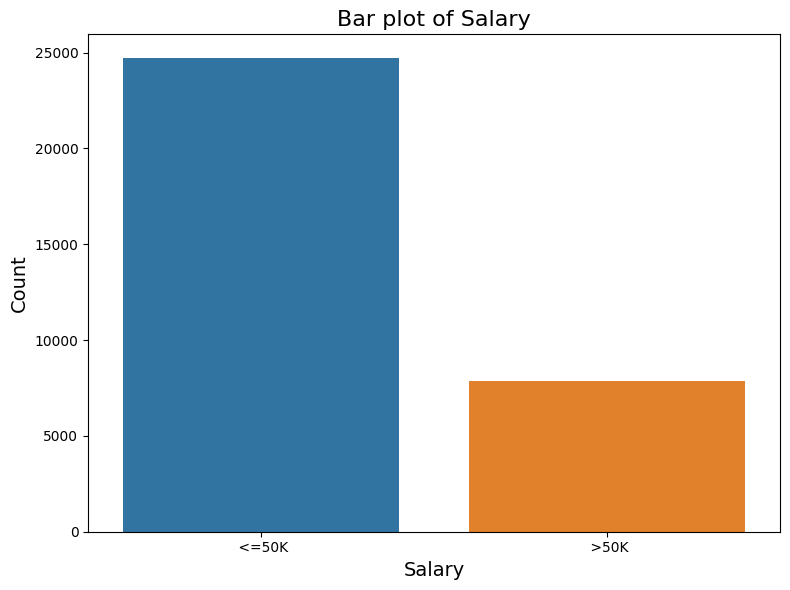

In [19]:
plt.figure(figsize=[8, 6])  # Figure size

x, y = "Salary", "Count"
sns.barplot(x=x, y=y, data=temp)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Bar plot of {x}", size=16)

plt.tight_layout()
plt.show()

The above shows that **24719** individuals in this data earn less than or equal to 50k while **7841** individuals earn more than 50k.

### **Visualize Count Plots of Variables.**


##### **Value_counts of variables**

In [20]:
# store the value_counts of each feature in variables
Age = feature_counts(data = sal_1, feature = "Age")
Workclass = feature_counts(data = sal_1, feature = "Workclass")
Final_weight = feature_counts(data = sal_1, feature = "Final_weight")
Education_num = feature_counts(data = sal_1, feature = "Education_num")
Marital_status = feature_counts(data = sal_1, feature = "Marital_status")
Occupation = feature_counts(data = sal_1, feature = "Occupation")
Relationship = feature_counts(data = sal_1, feature = "Relationship")
Race = feature_counts(data = sal_1, feature = "Race")
Sex = feature_counts(data = sal_1, feature = "Sex")
Capital_gain =feature_counts(data = sal_1, feature = "Capital_gain")
Capital_loss =feature_counts(data = sal_1, feature = "Capital_loss")
Hours_per_week = feature_counts(data = sal_1, feature = "Hours_per_week")
Country =feature_counts(data = sal_1, feature = "Country")



In [21]:
# value count of workclass
Workclass

,Workclass,Count
0,Private,22696
1,Self-emp-not-inc,2541
2,Local-gov,2093
3,Others,1836
4,State-gov,1297
5,Self-emp-inc,1116
6,Federal-gov,960
7,Without-pay,14
8,Never-worked,7


In [22]:
# value count of age
Age

,Age,Count
0,36,898
1,31,888
2,34,886
3,23,877
4,35,876
5,33,875
6,28,867
7,30,861
8,37,858
9,25,841


In [23]:
# value count of education num
Education_num

,Education_num,Count
0,9,10501
1,10,7291
2,13,5354
3,14,1723
4,11,1382
5,7,1175
6,12,1067
7,6,933
8,4,646
9,15,576


In [24]:
# value count of race
Race

,Race,Count
0,White,27815
1,Black,3124
2,Asian-Pac-Islander,1039
3,Amer-Indian-Eskimo,311
4,Other,271


In [25]:
# value count of marital status
Marital_status

,Marital_status,Count
0,Married-civ-spouse,14976
1,Never-married,10682
2,Divorced,4443
3,Separated,1025
4,Widowed,993
5,Married-spouse-absent,418
6,Married-AF-spouse,23


In [26]:
# value count of sex
Sex

,Sex,Count
0,Male,21789
1,Female,10771


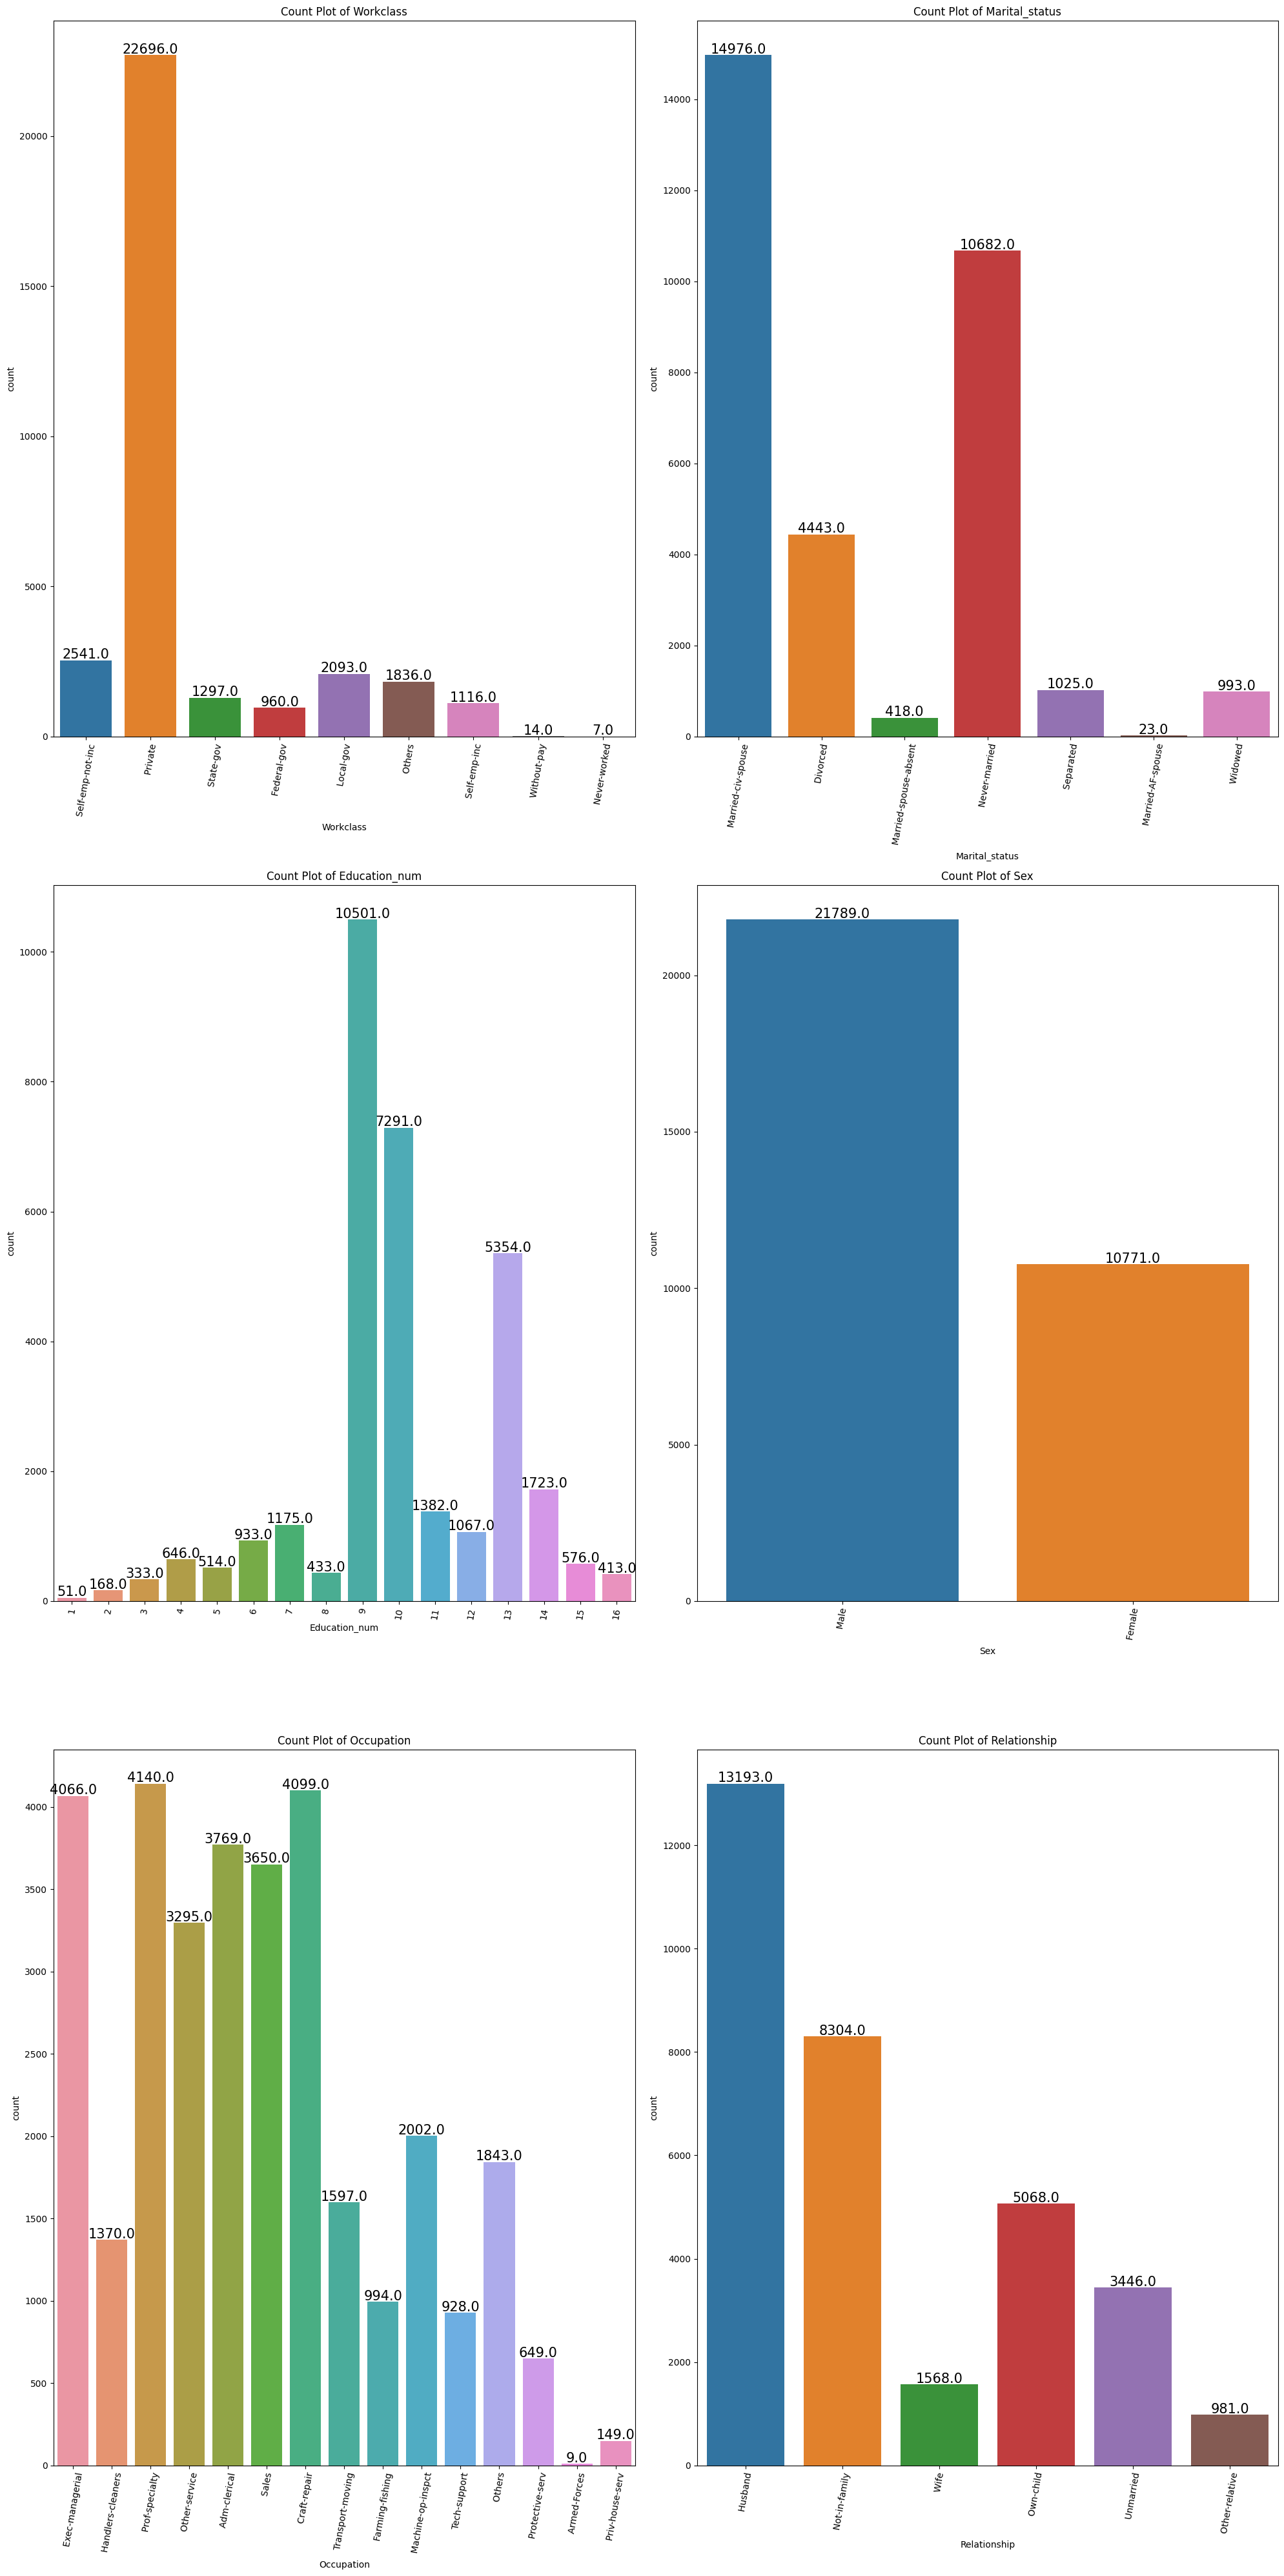

In [27]:
# plot counts of variables
feats = ["Workclass","Marital_status", "Education_num", "Sex", "Occupation", "Relationship"]
plot_counts(
    data=sal_1, features=feats, n_rows=3, n_cols=2, figsize=(20, 40)
)

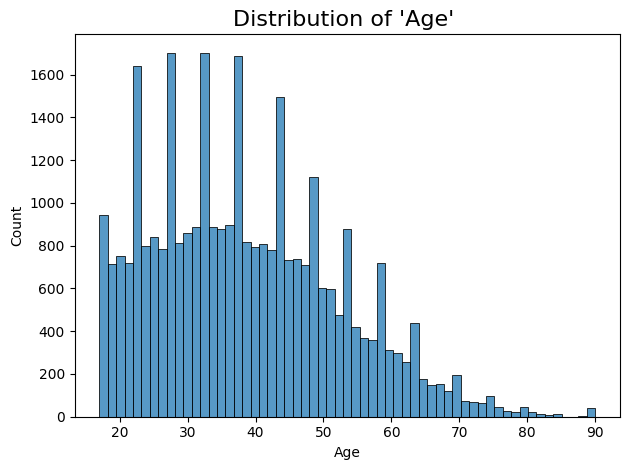

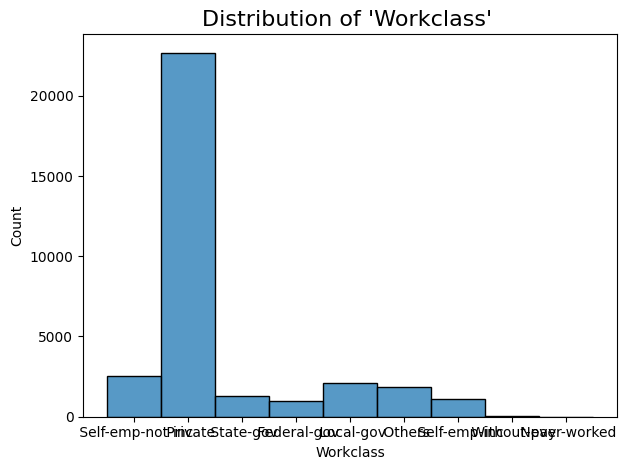

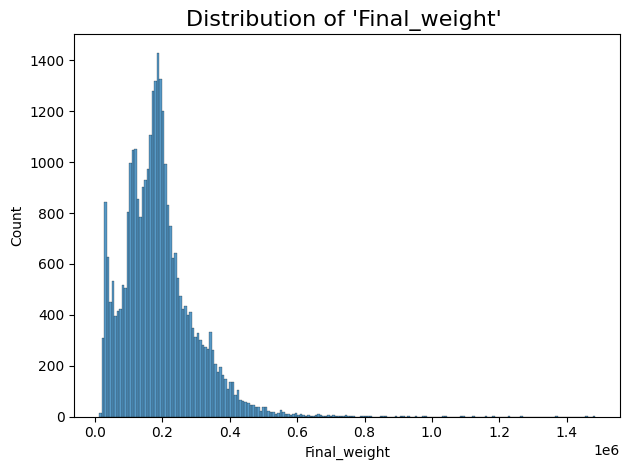

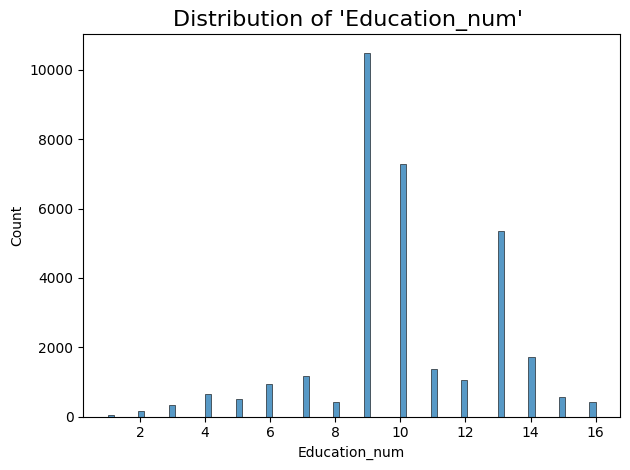

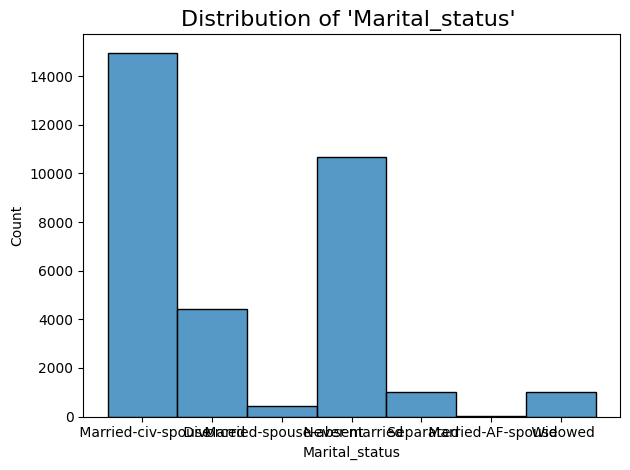

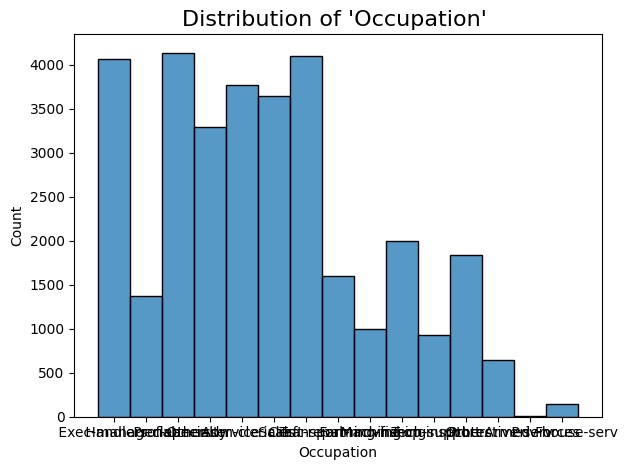

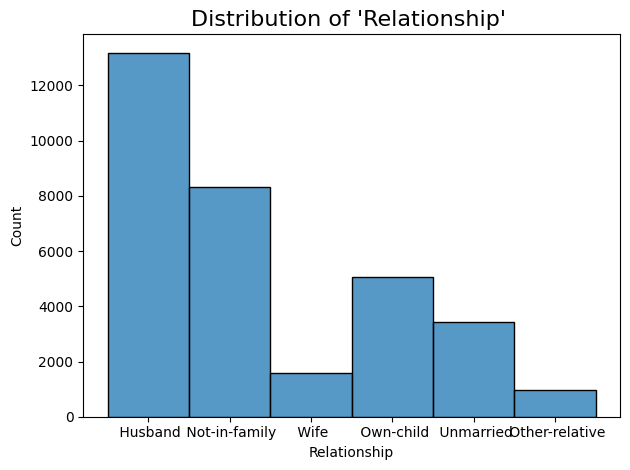

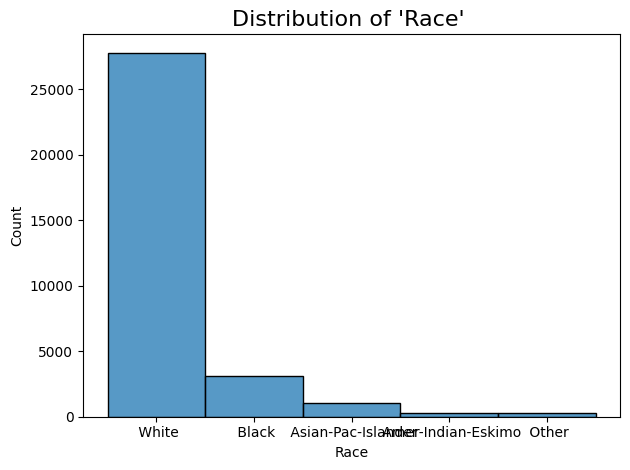

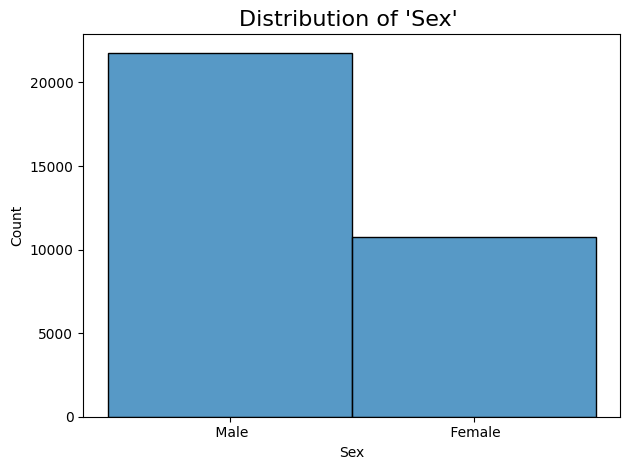

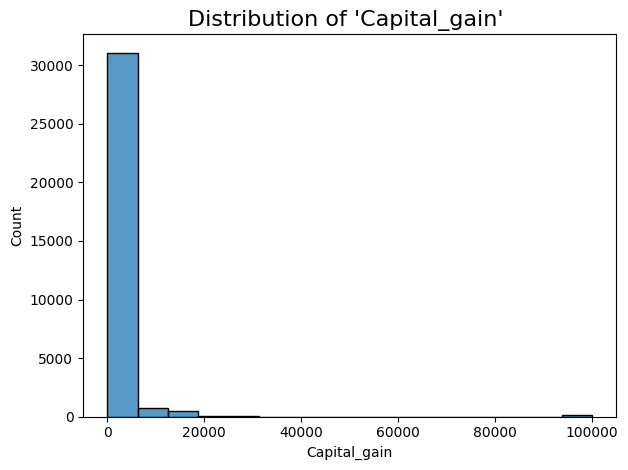

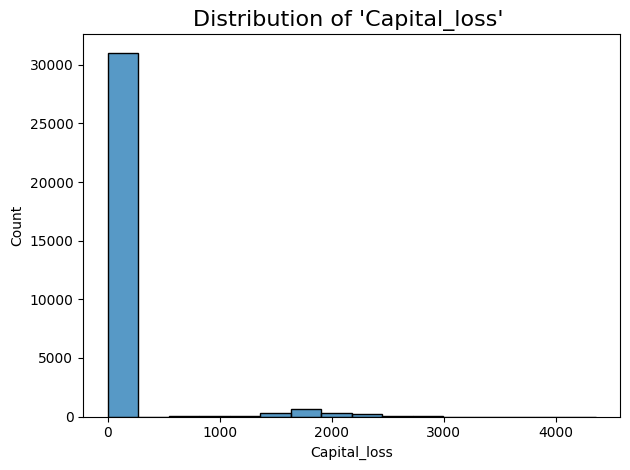

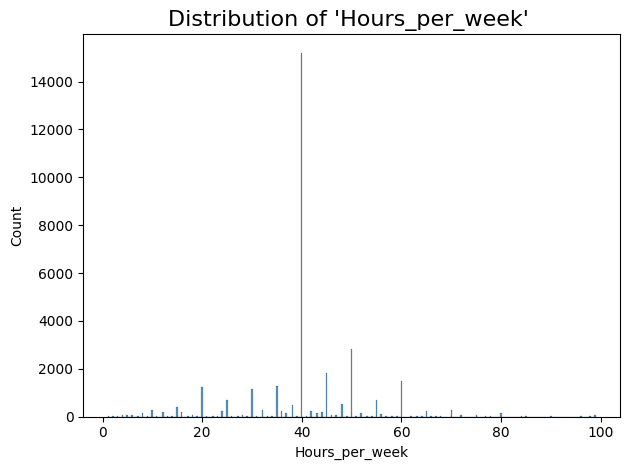

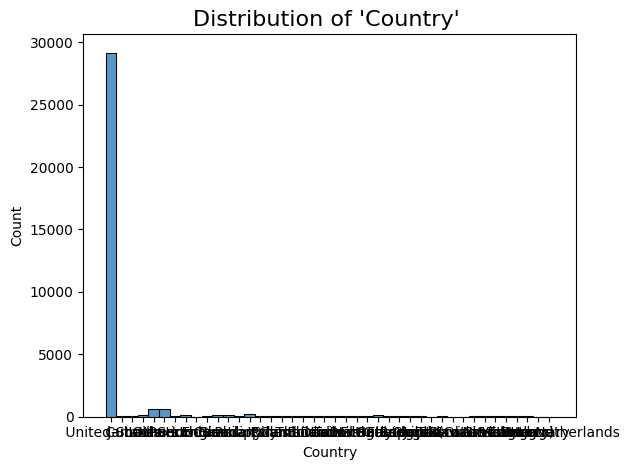

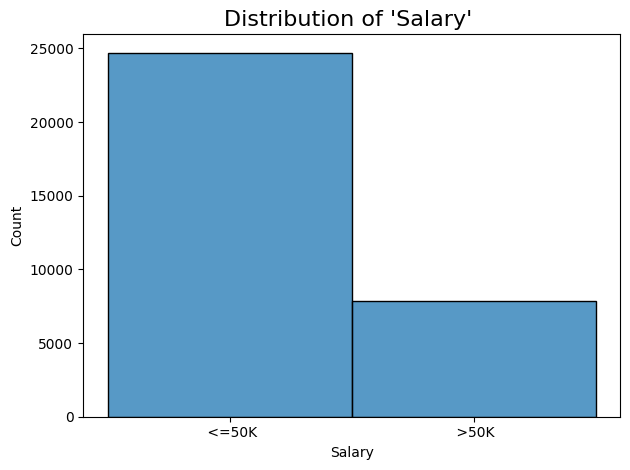

In [28]:
# histogram of variables
for feat in sal_1:
    plot_histogram(data=sal_1, feature=feat, figsize = (35, 15))


### **Relationship Between Numerical Variables Using Pairplot (With Salary As the Hue)**

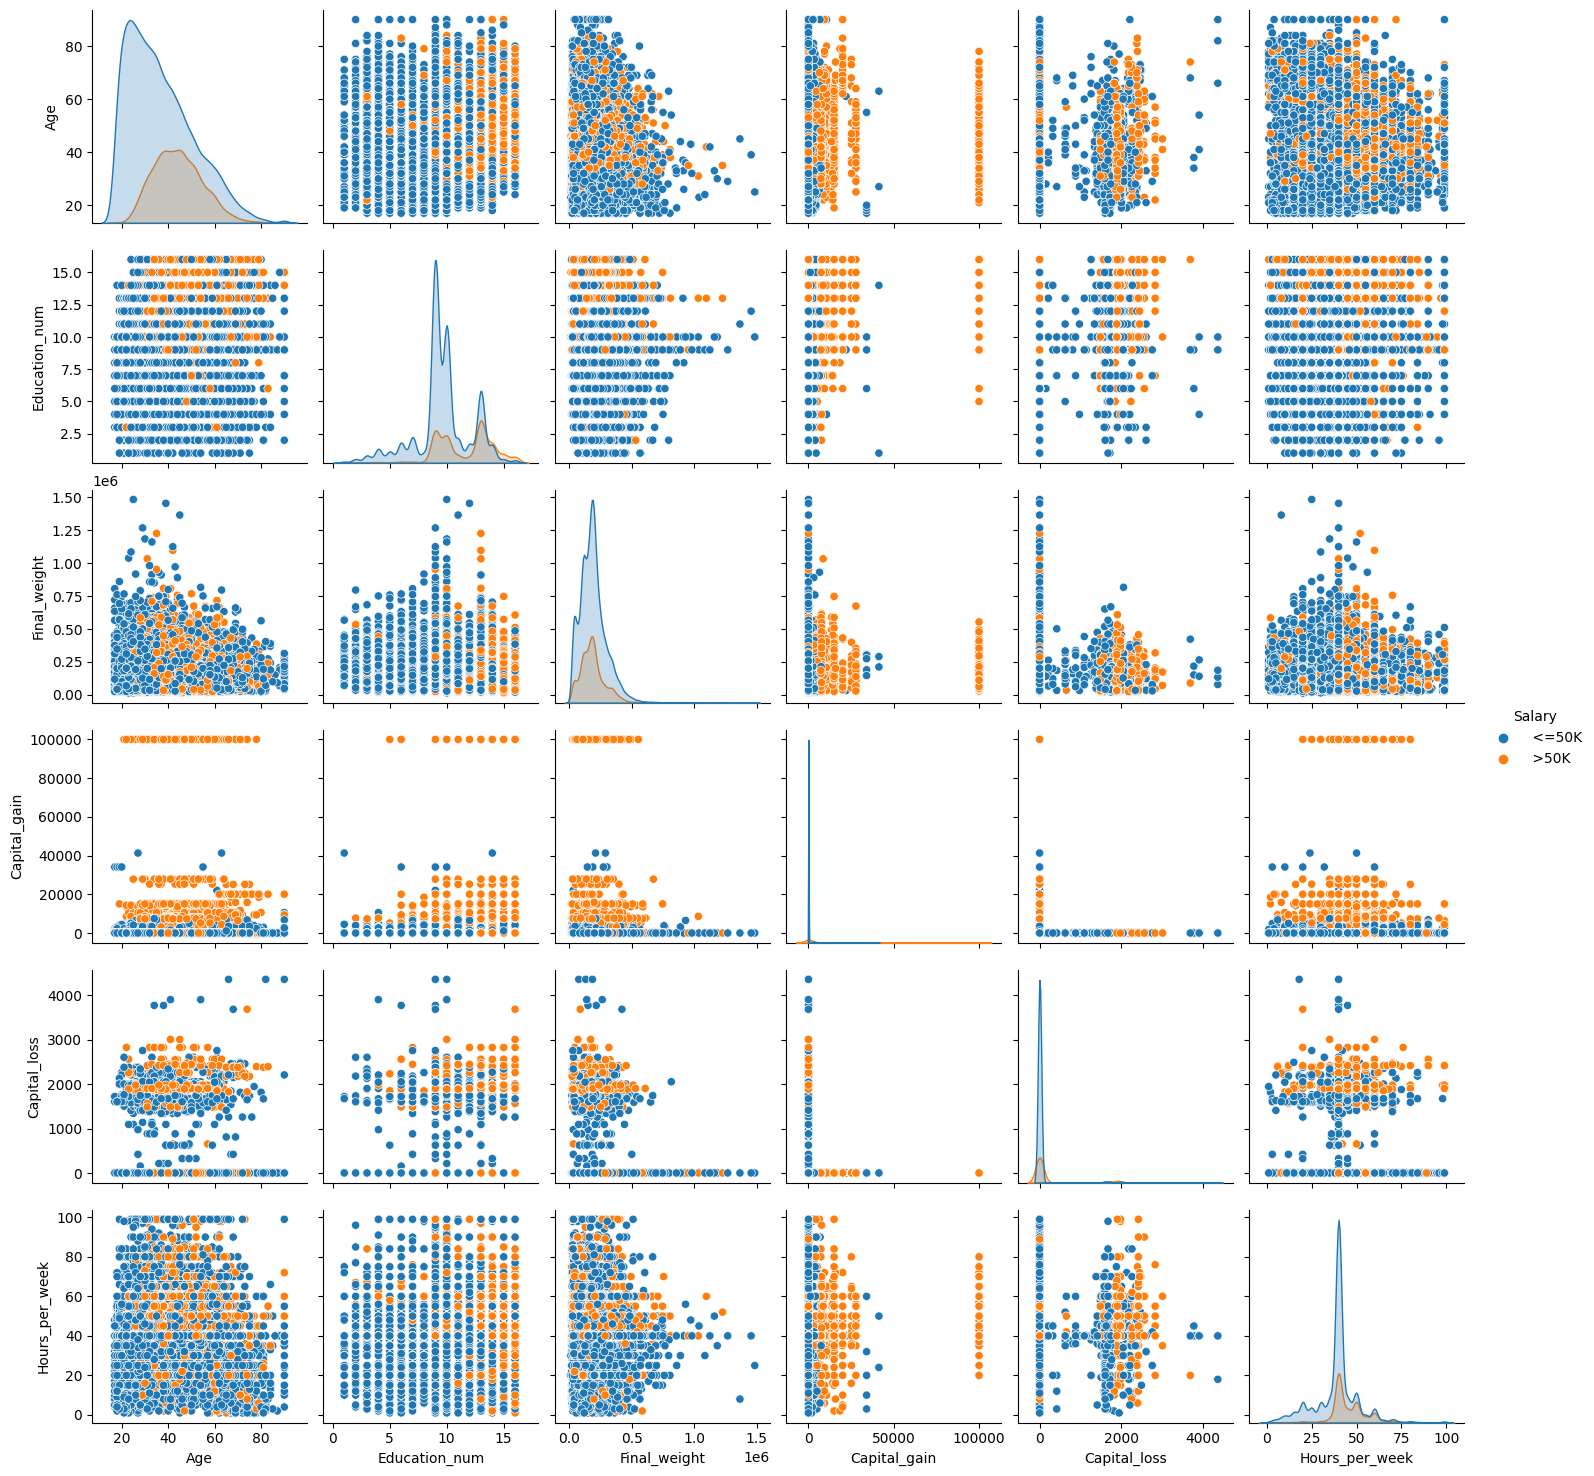

In [29]:
feat = ["Age", "Education_num", "Final_weight", "Capital_gain", "Capital_loss", "Hours_per_week", "Salary"]
temp = sal_1[feat]


sns.pairplot(
    temp,
    hue="Salary",
)
plt.show()

### **Visualize Relationship Between Target Variable And Other Variables.**

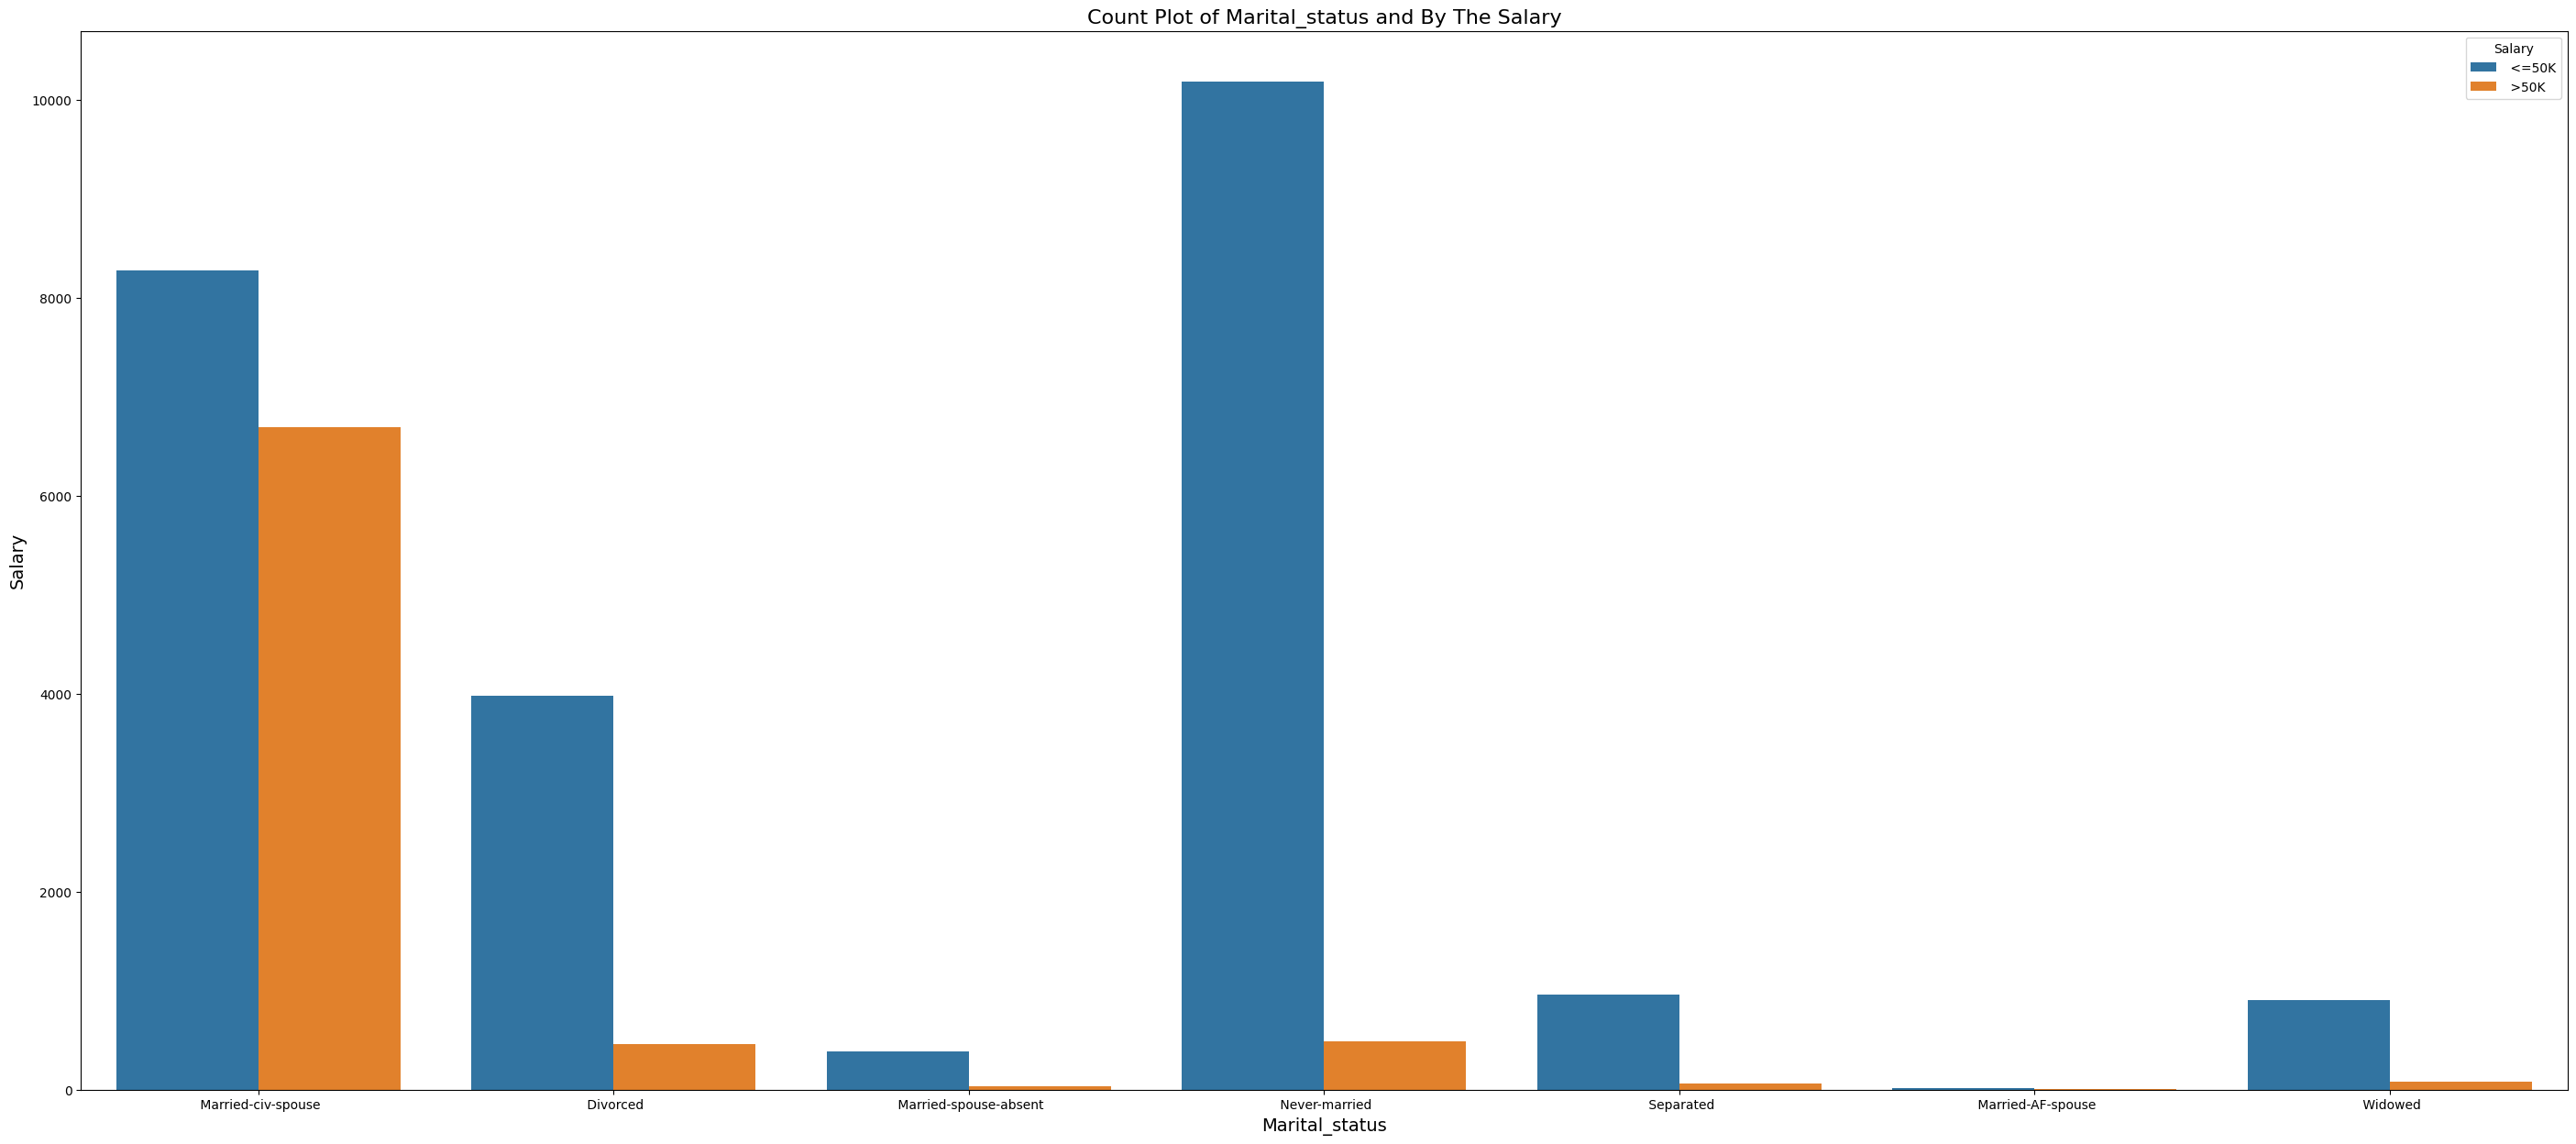

In [30]:
# marital status and salary

plt.figure(figsize=[35, 15])  # Figure size

x, y = "Marital_status", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

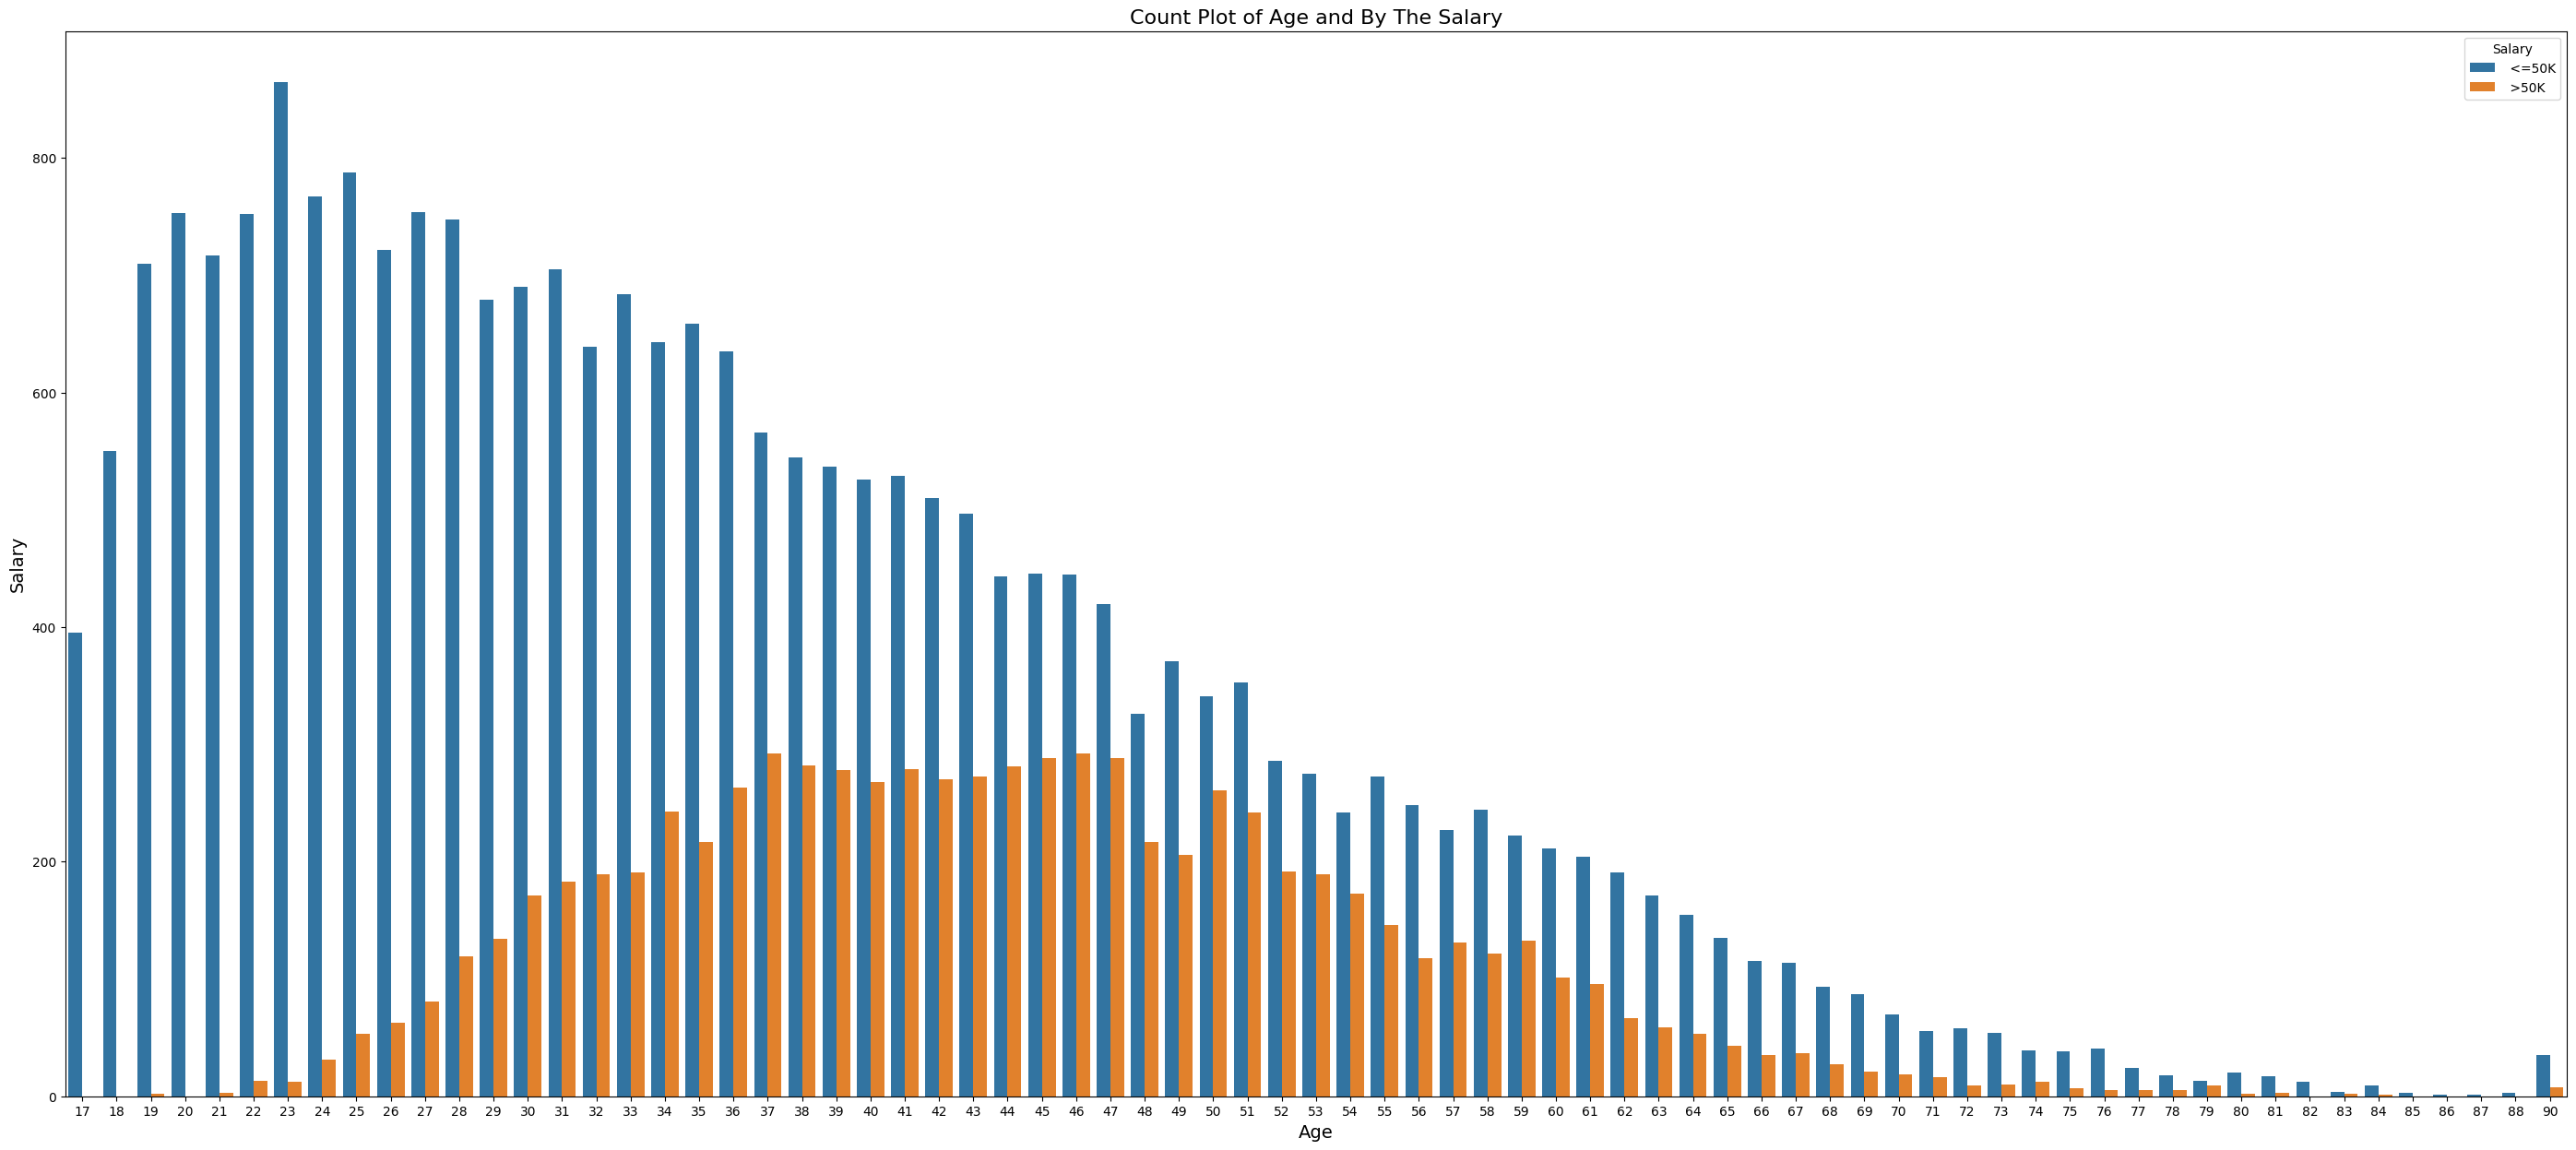

In [31]:
# age and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Age", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

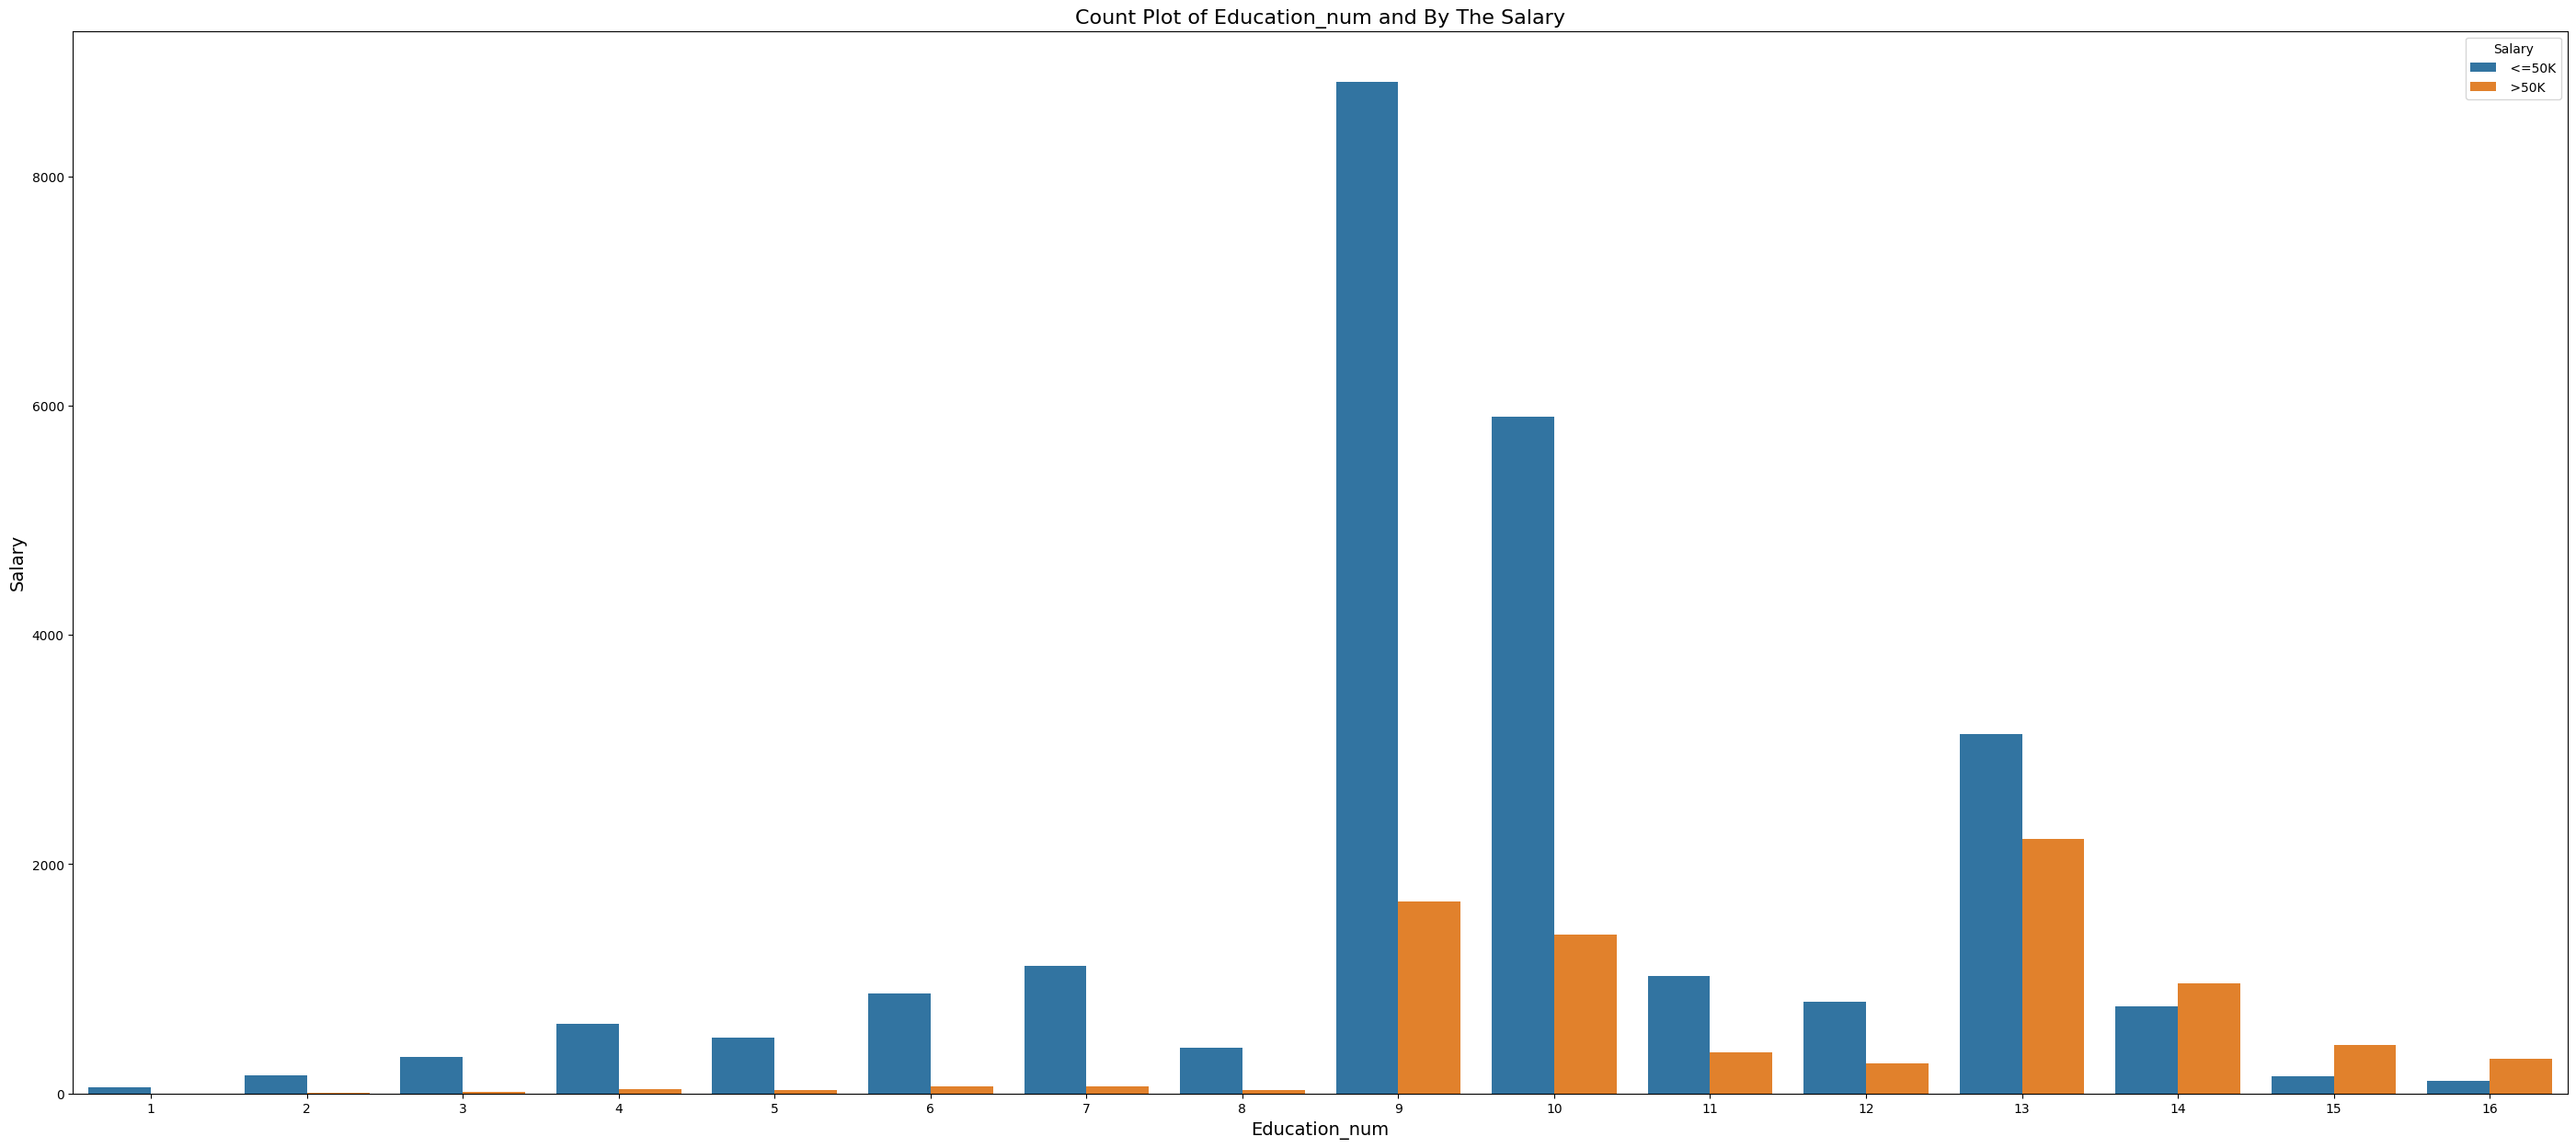

In [32]:
# education_ num and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Education_num", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

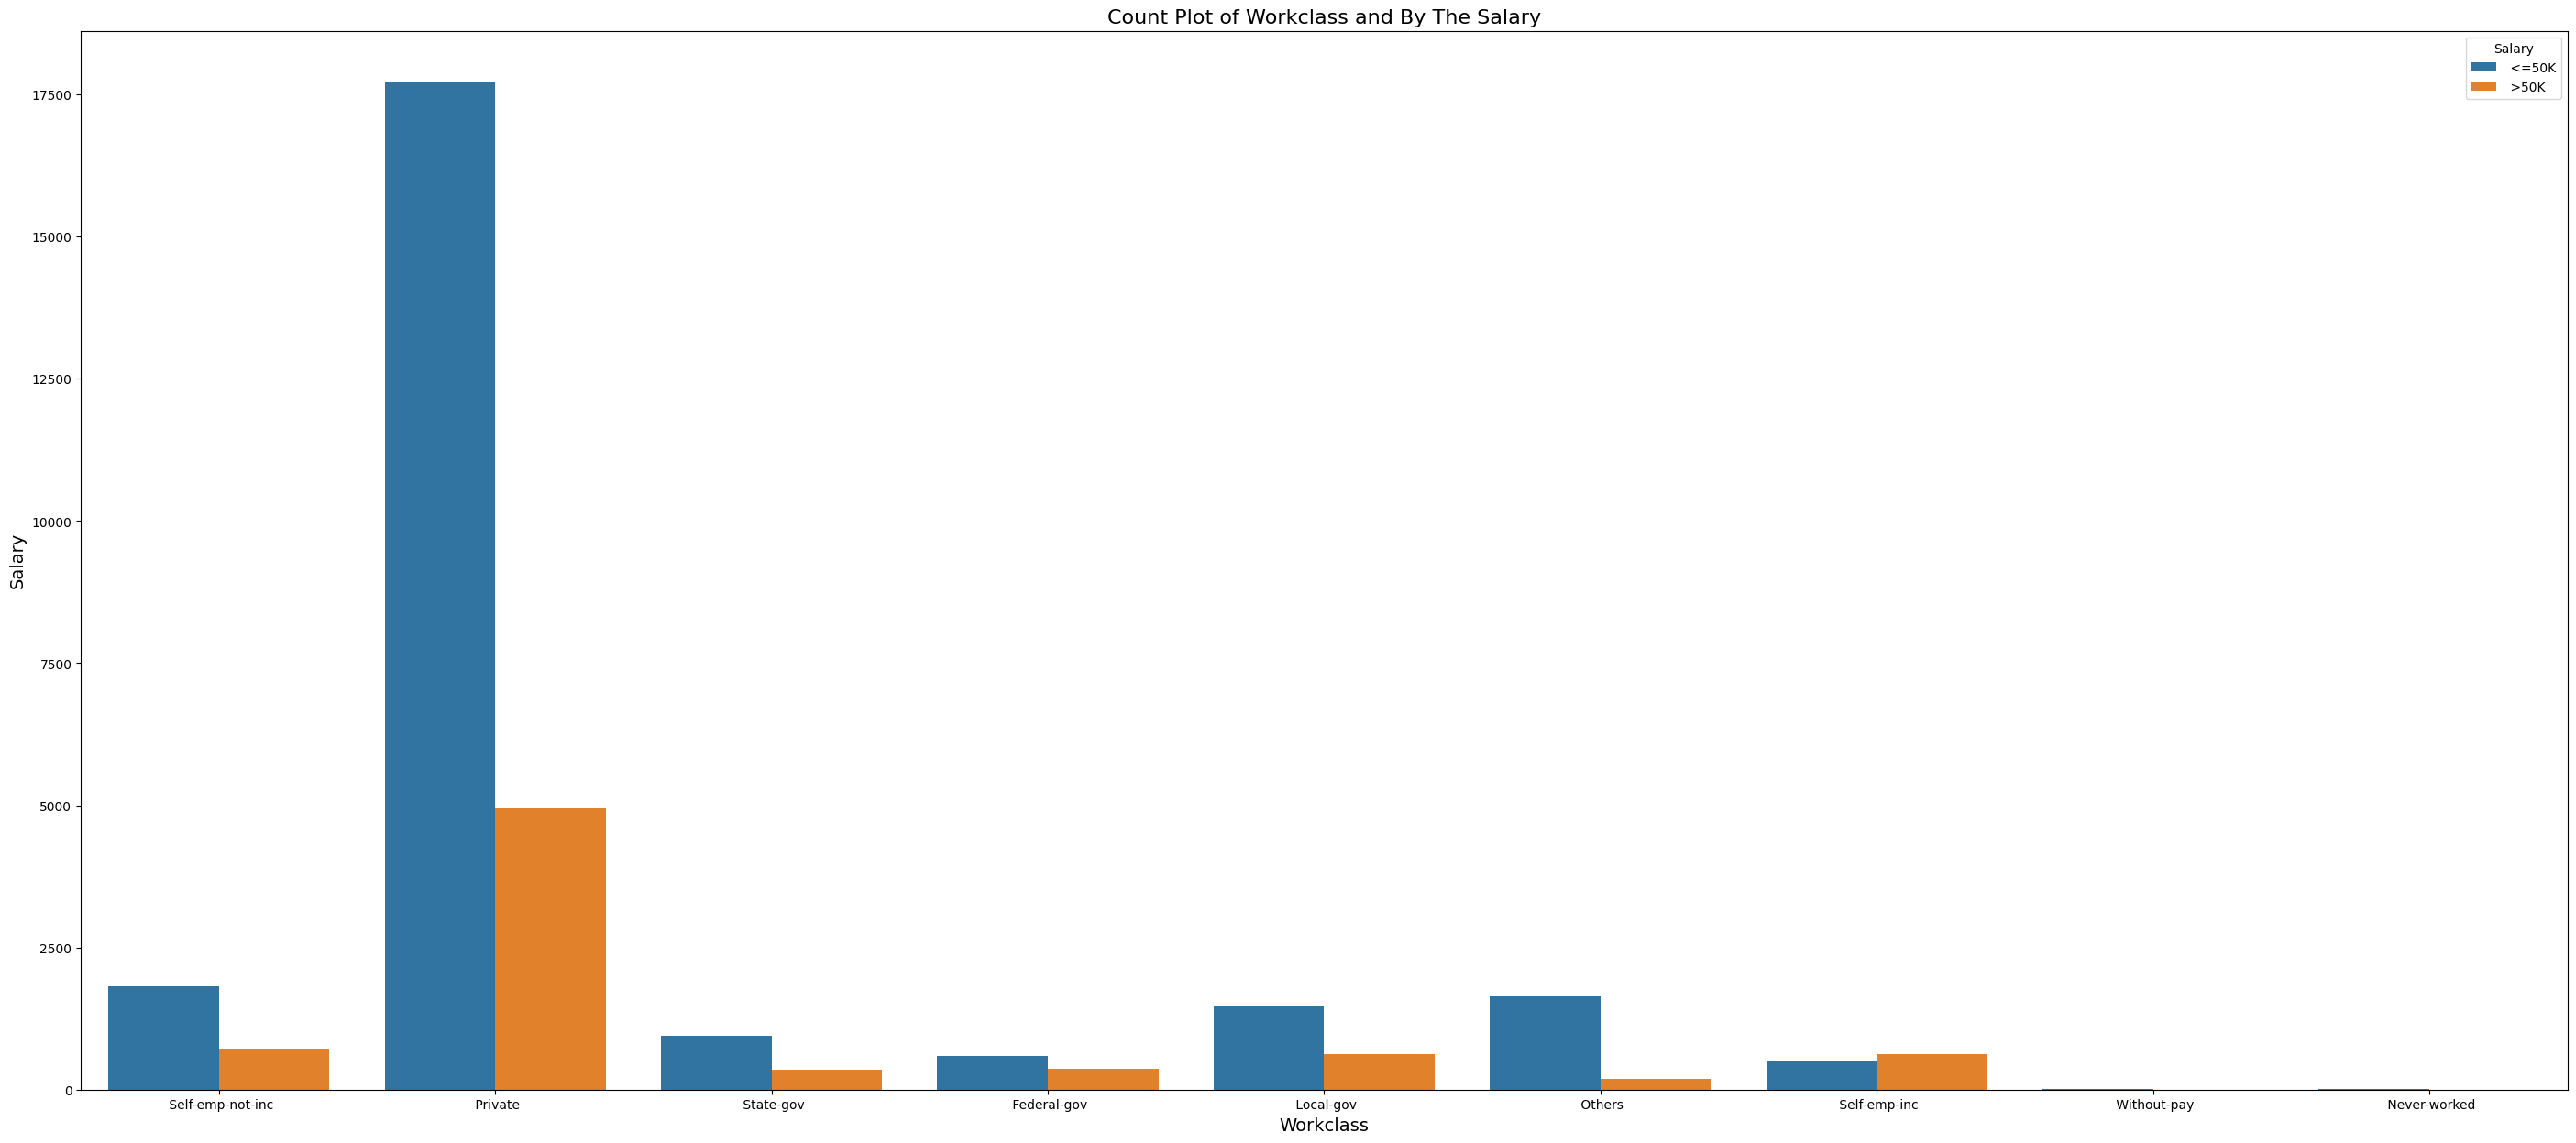

In [33]:
# workclass and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Workclass", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

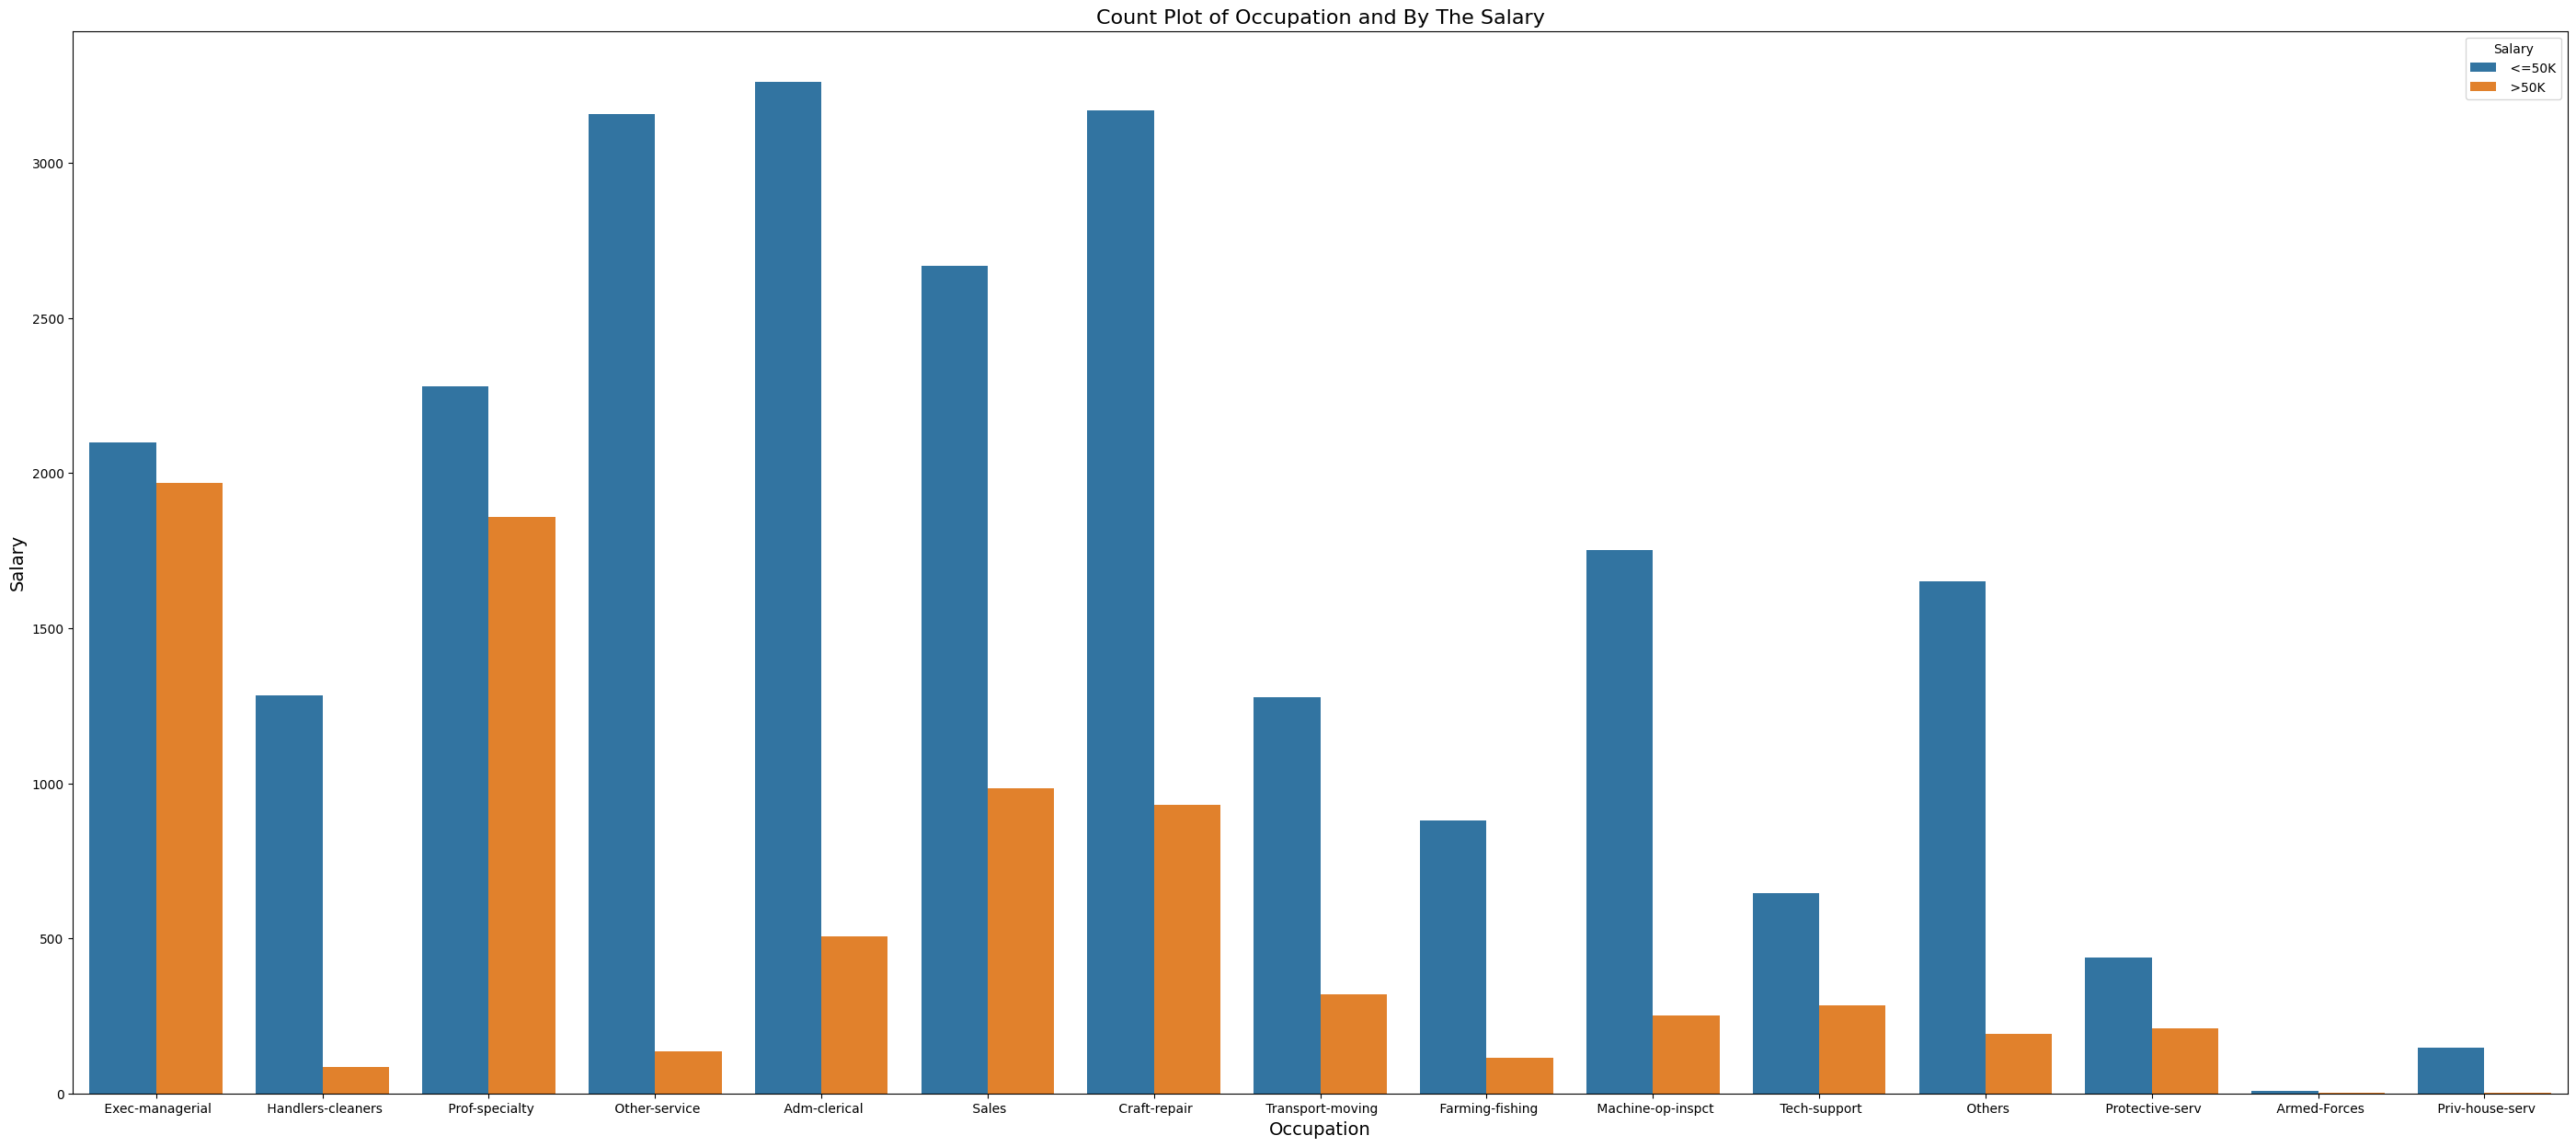

In [34]:
# occupation and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Occupation", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

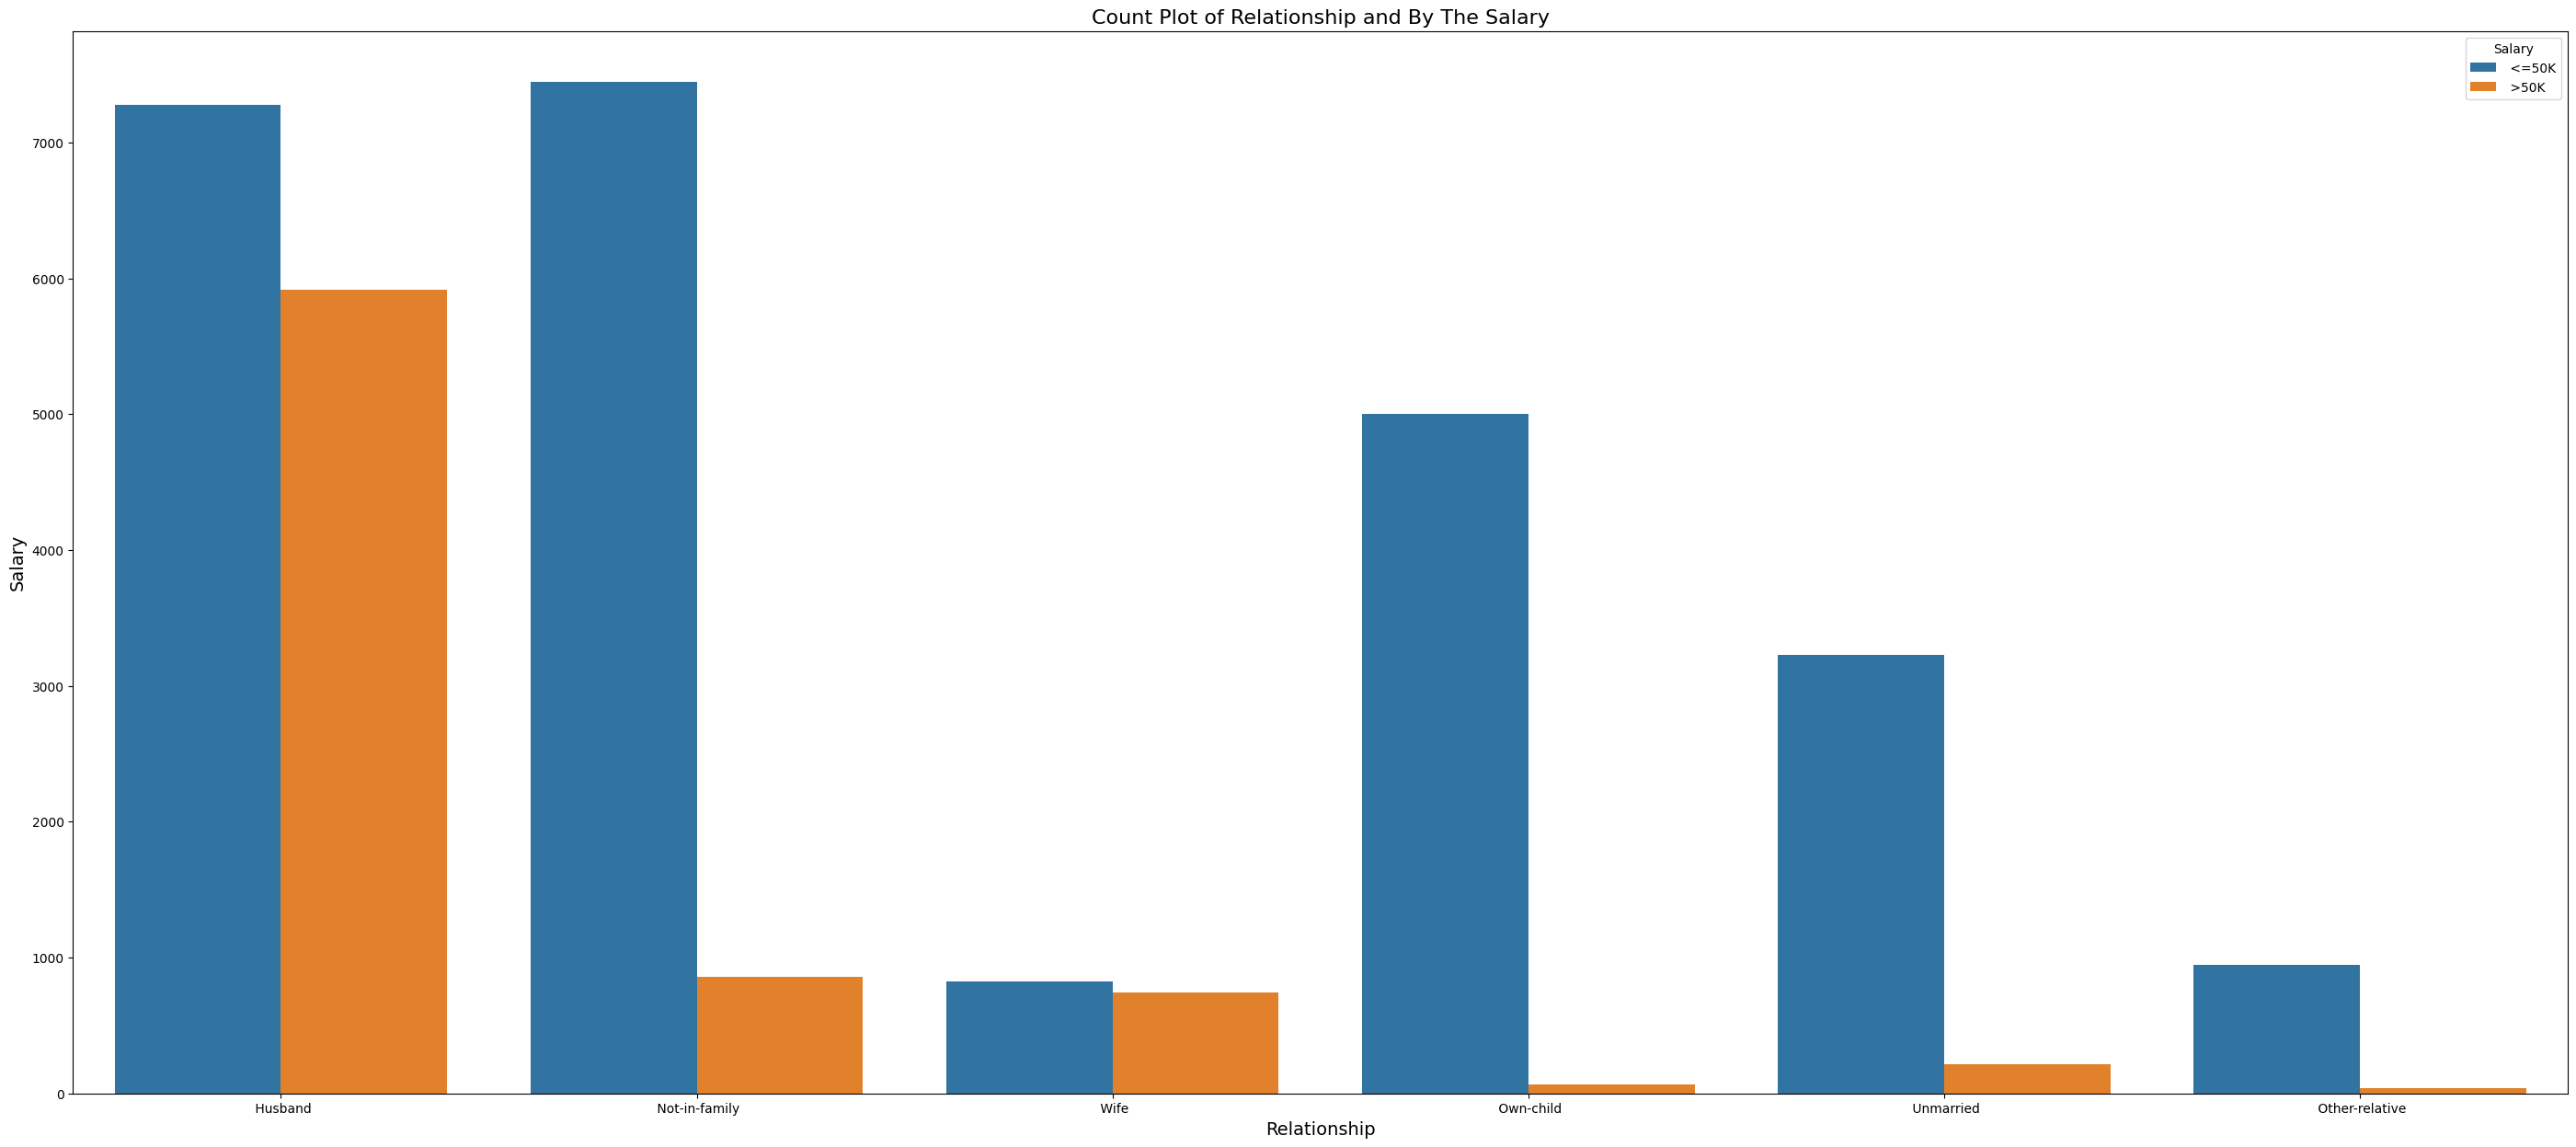

In [35]:
# relationship and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Relationship", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

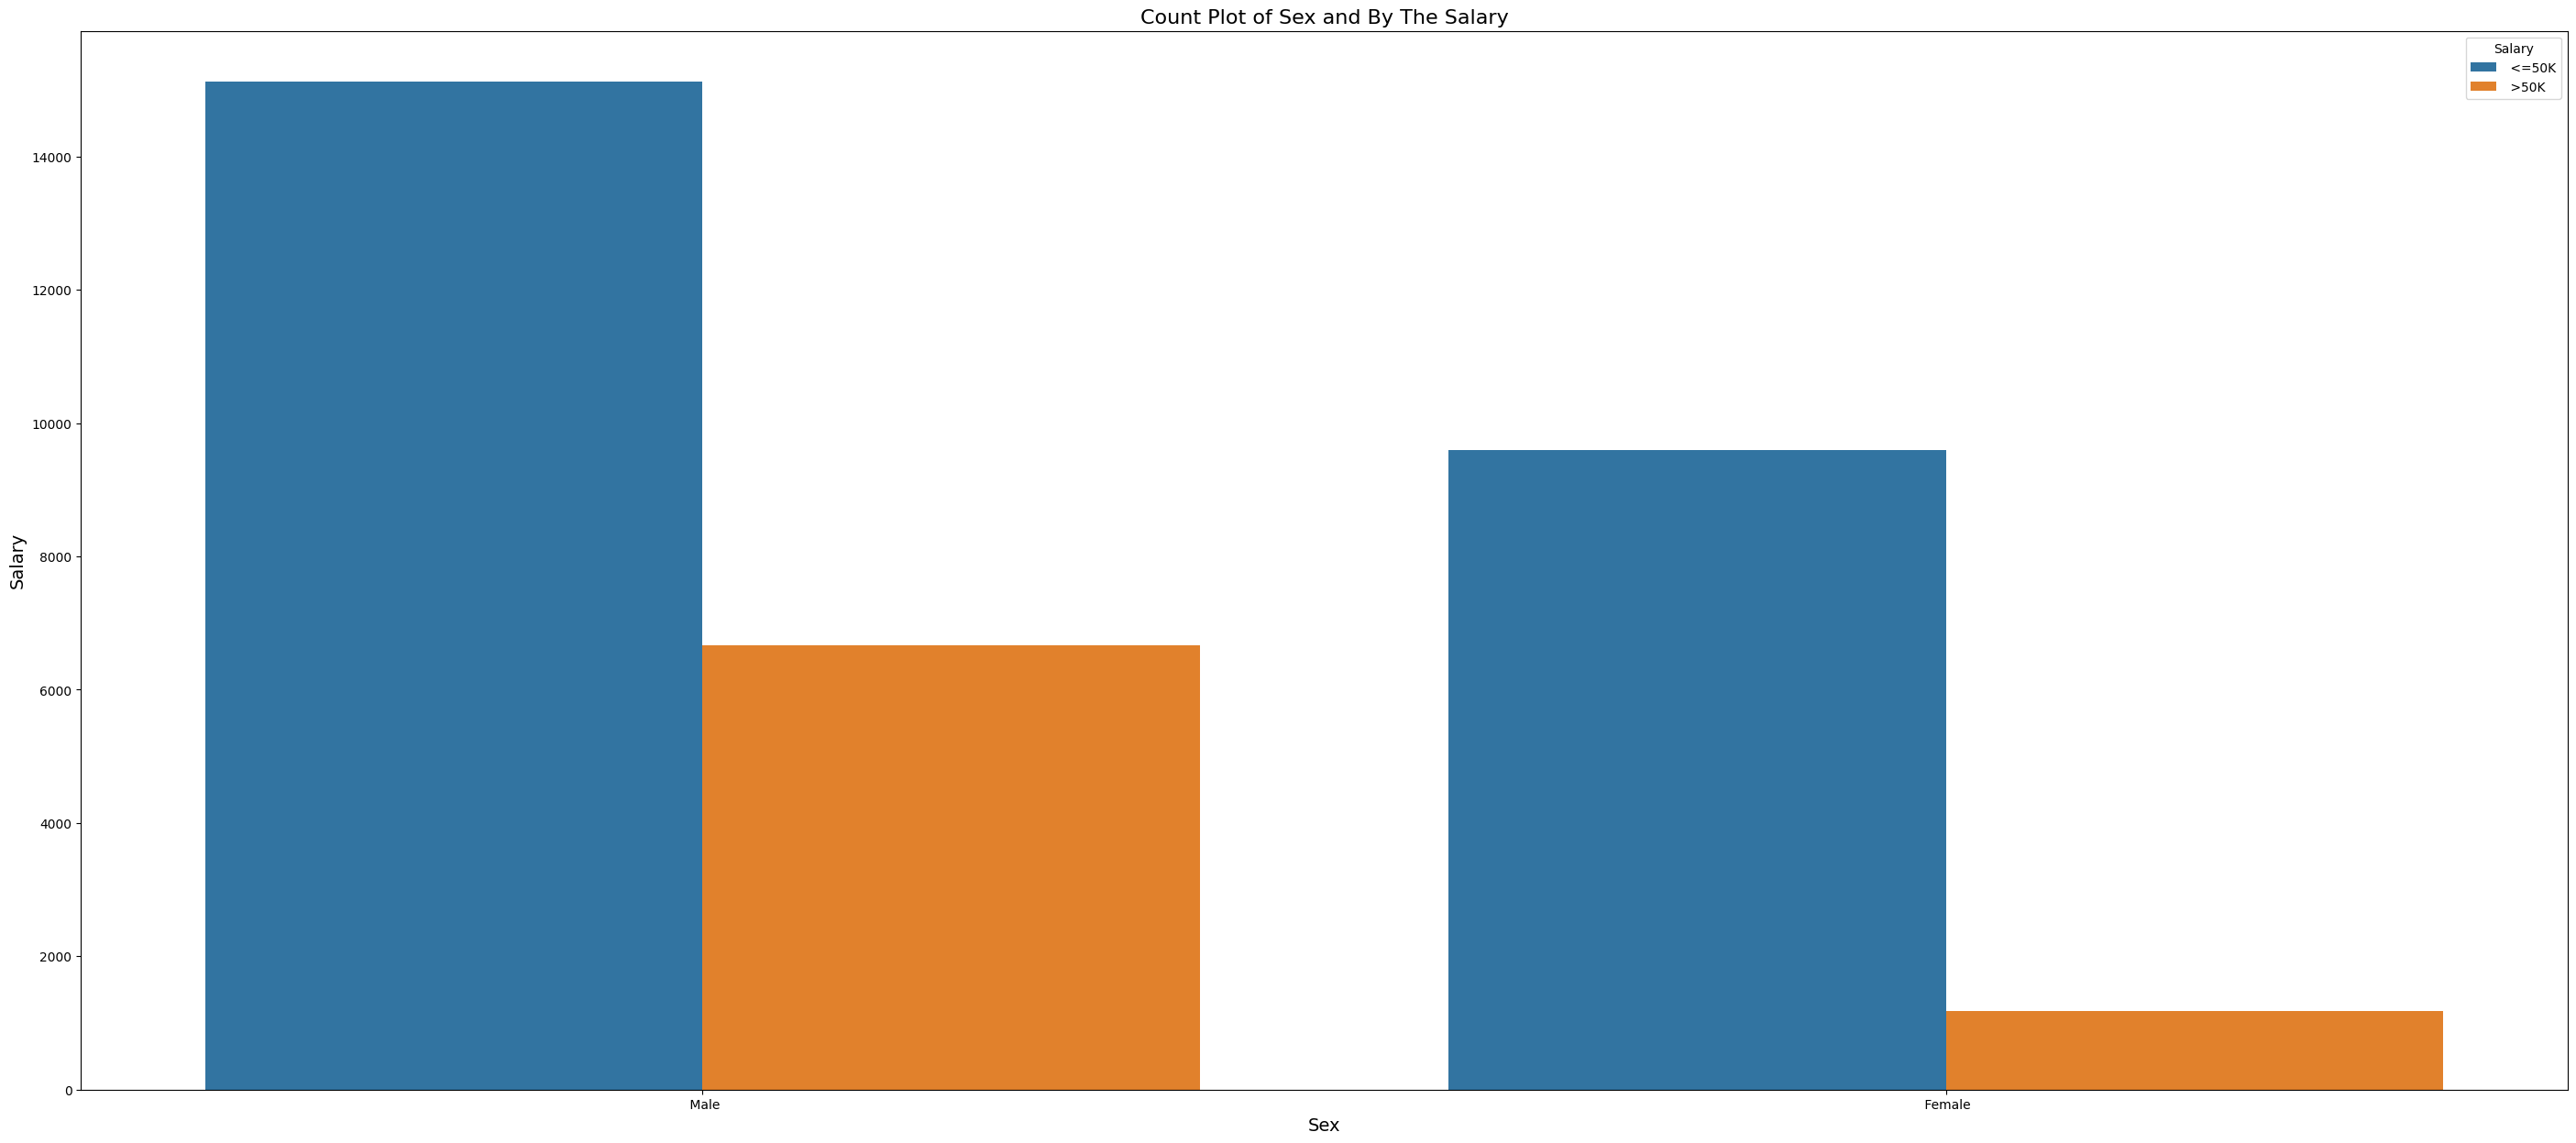

In [36]:
# sex and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Sex", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

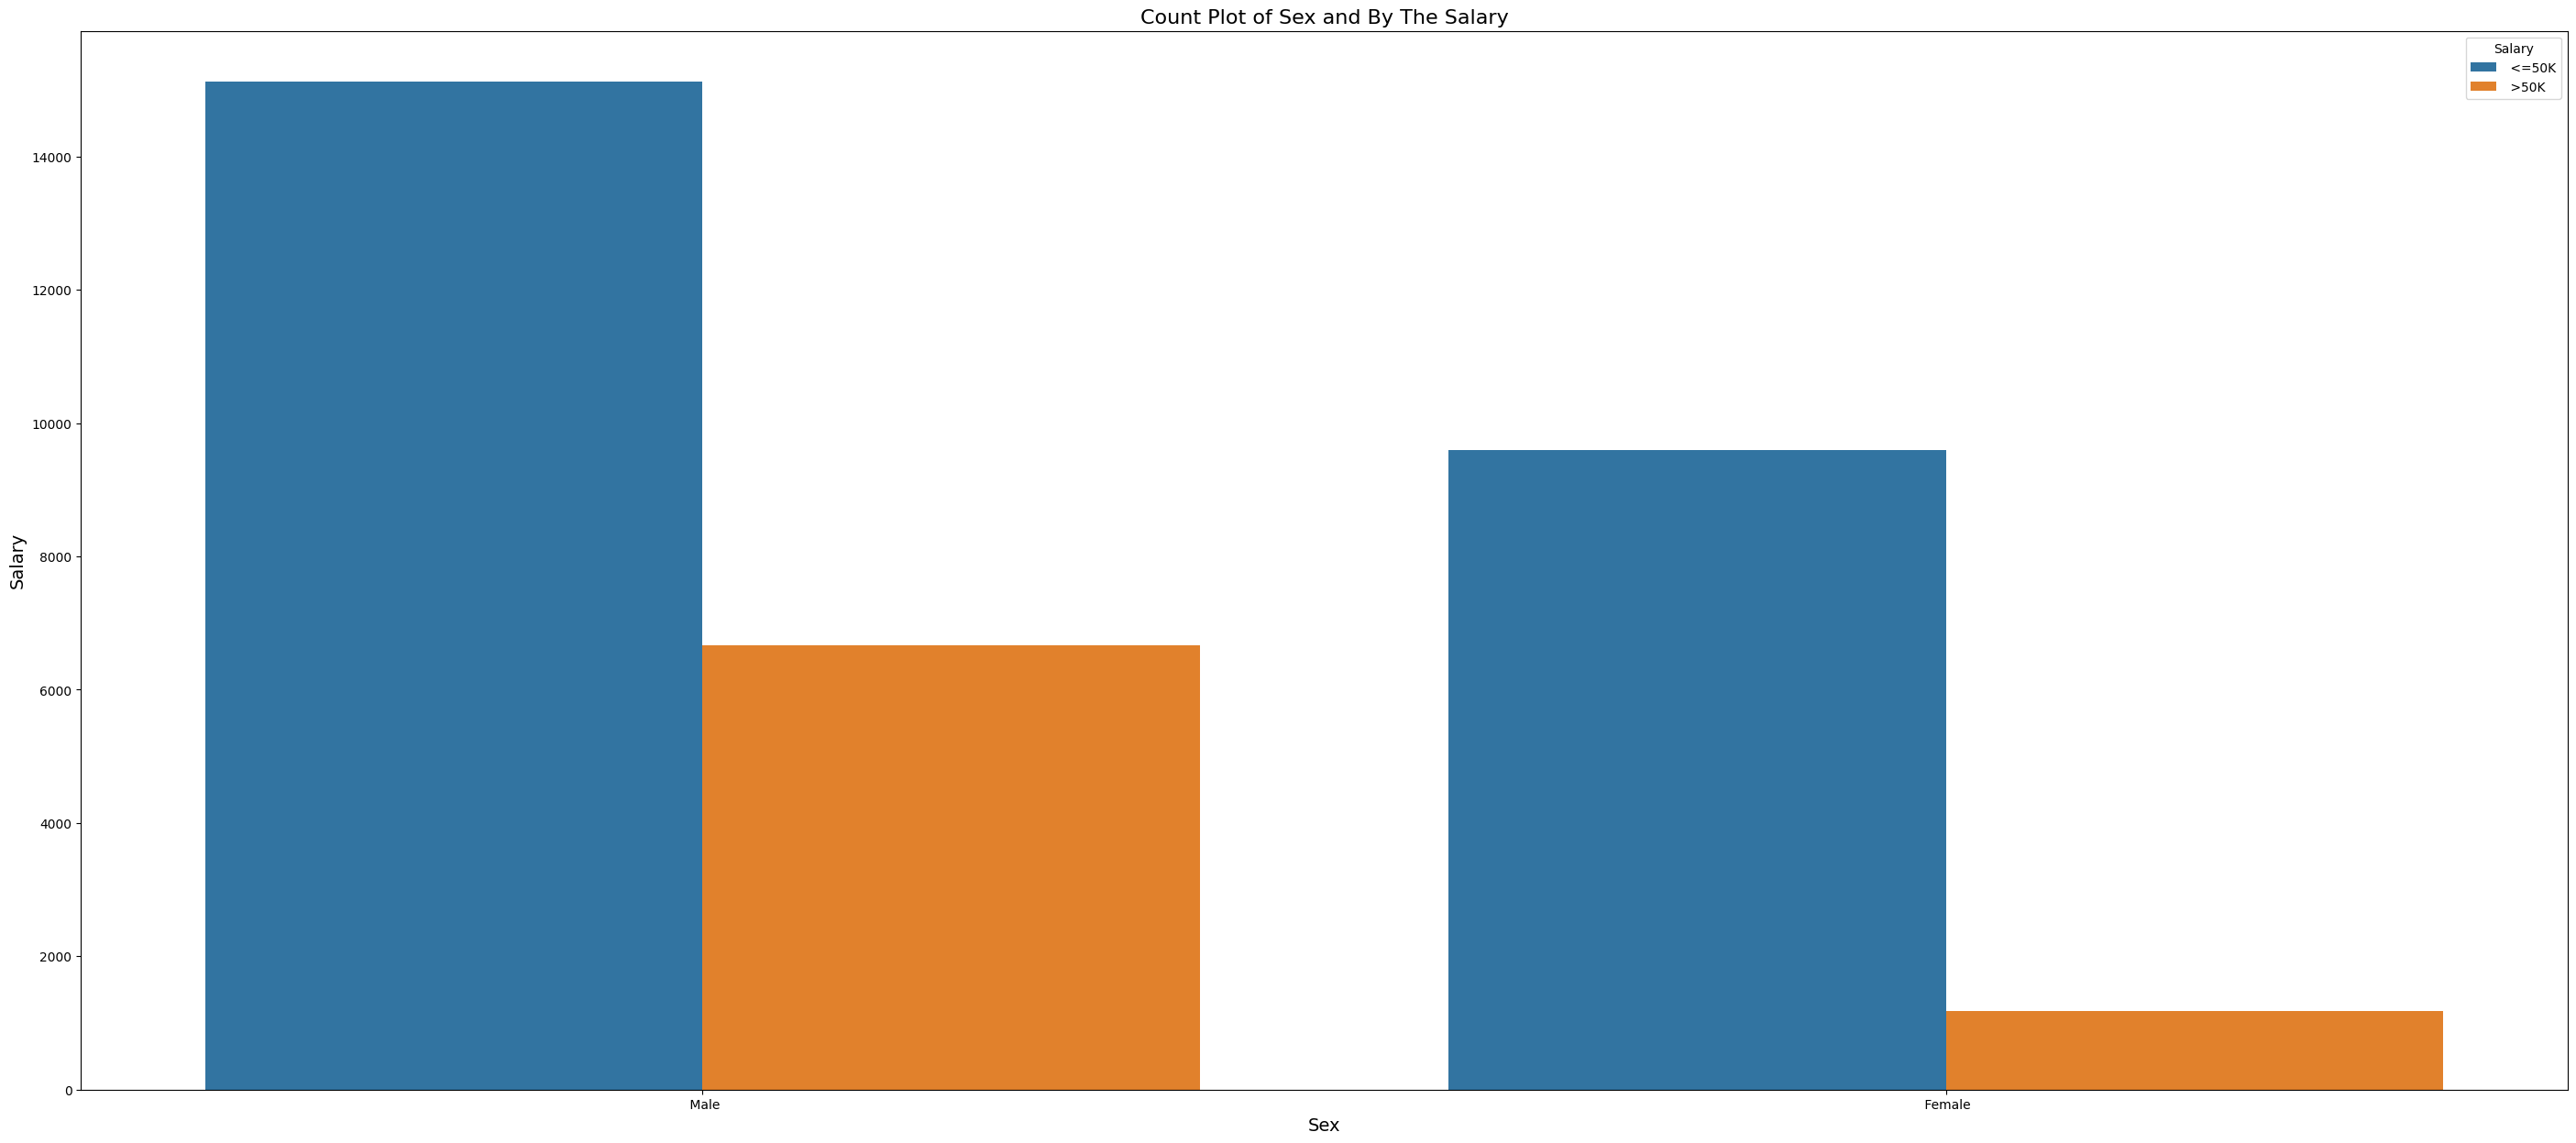

In [37]:
# race and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Sex", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

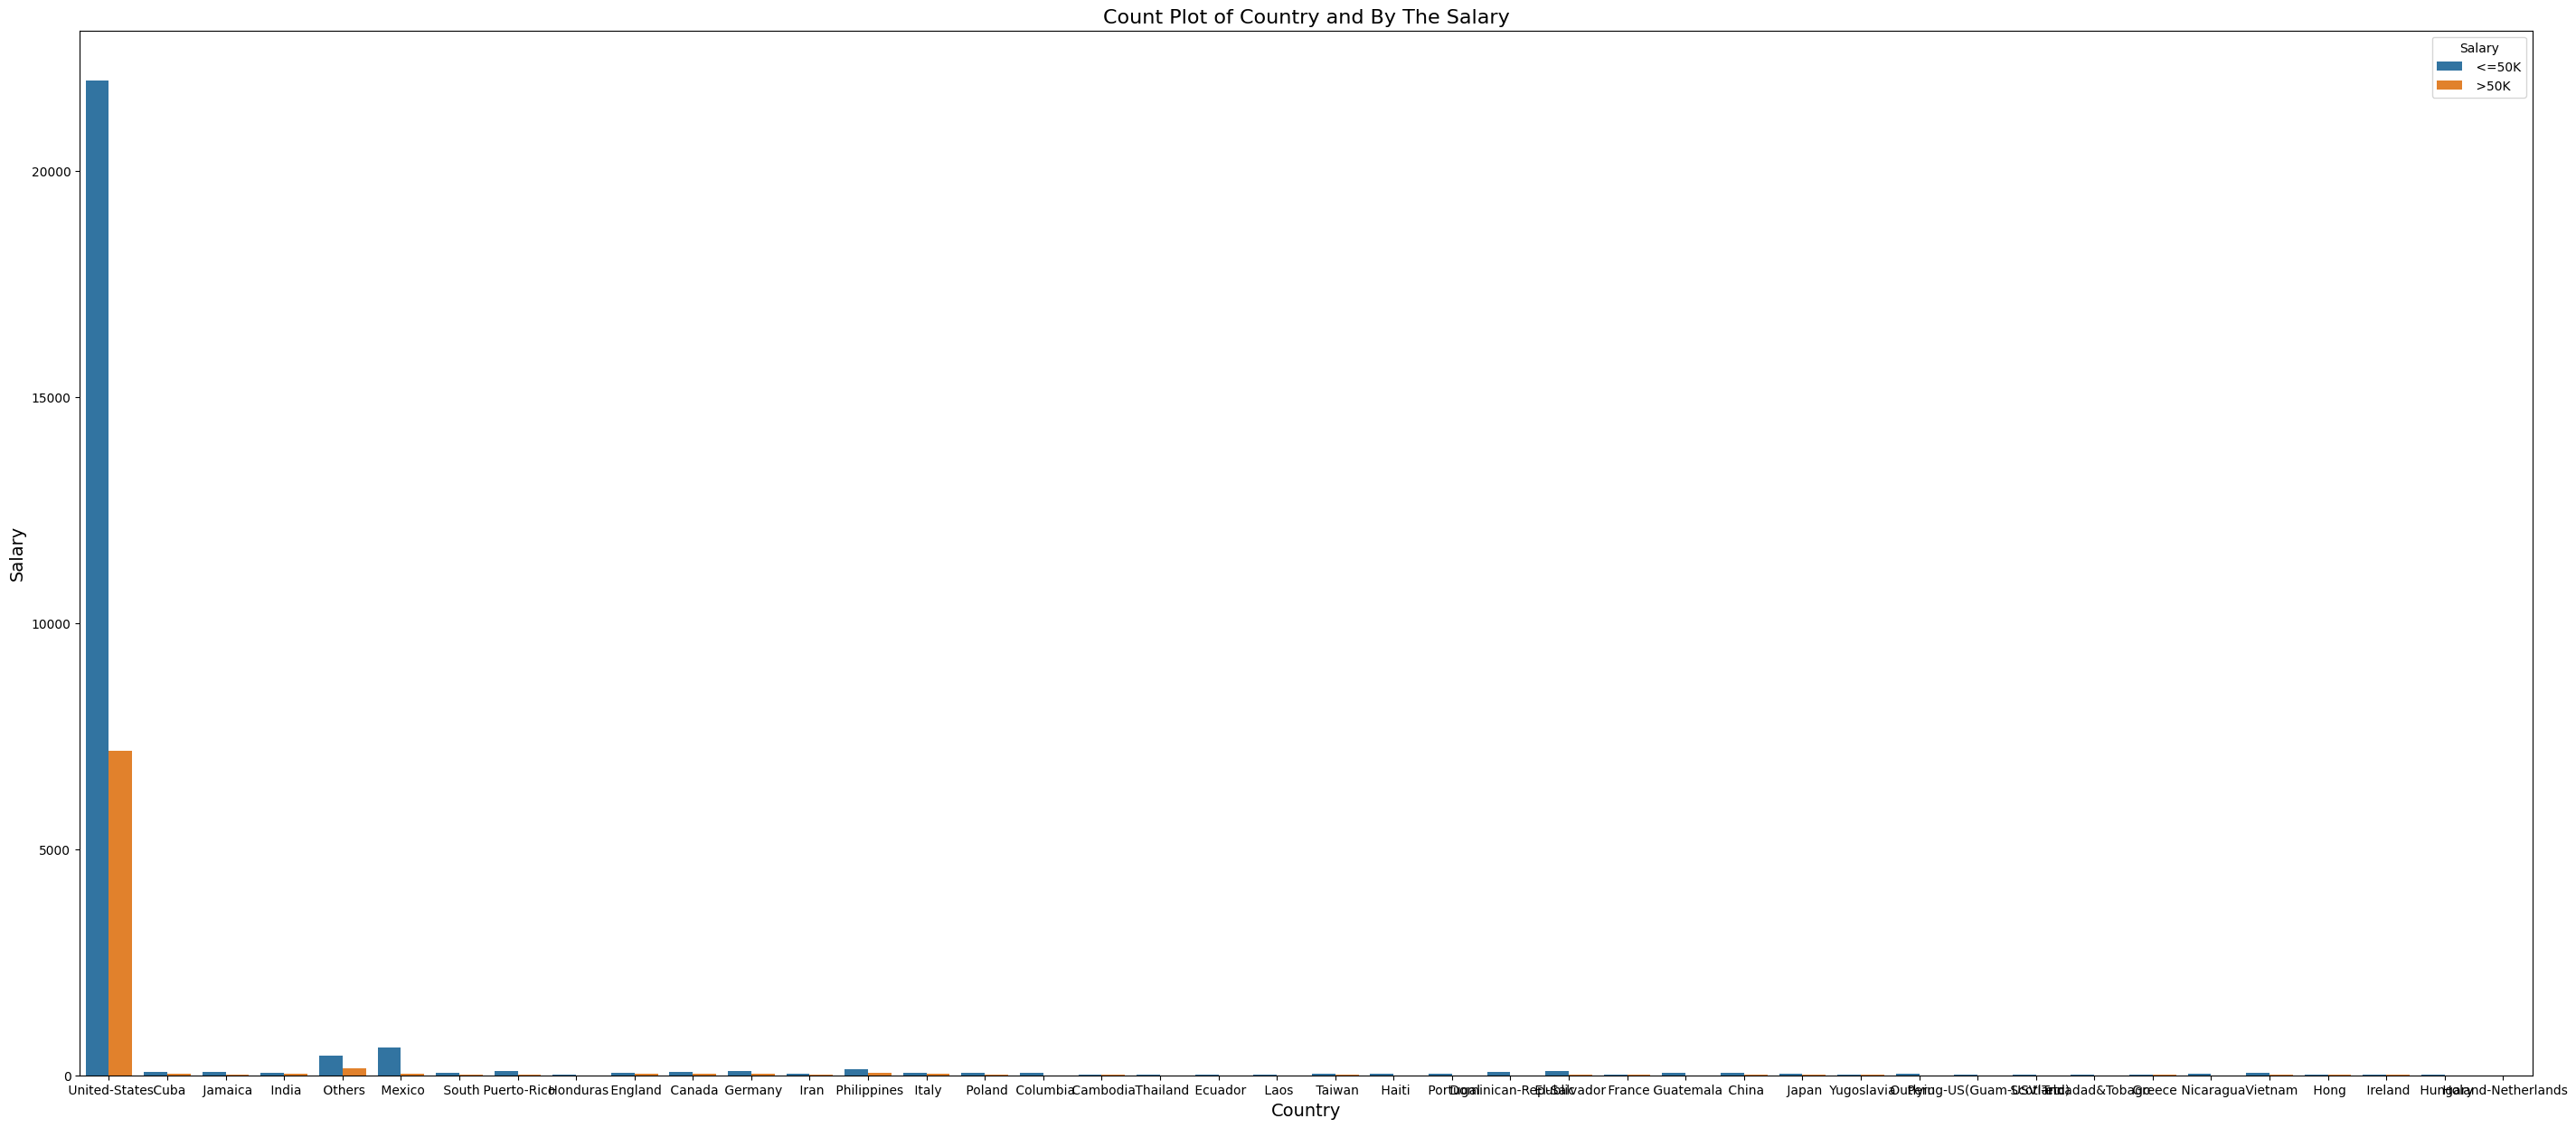

In [38]:
# country and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Country", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

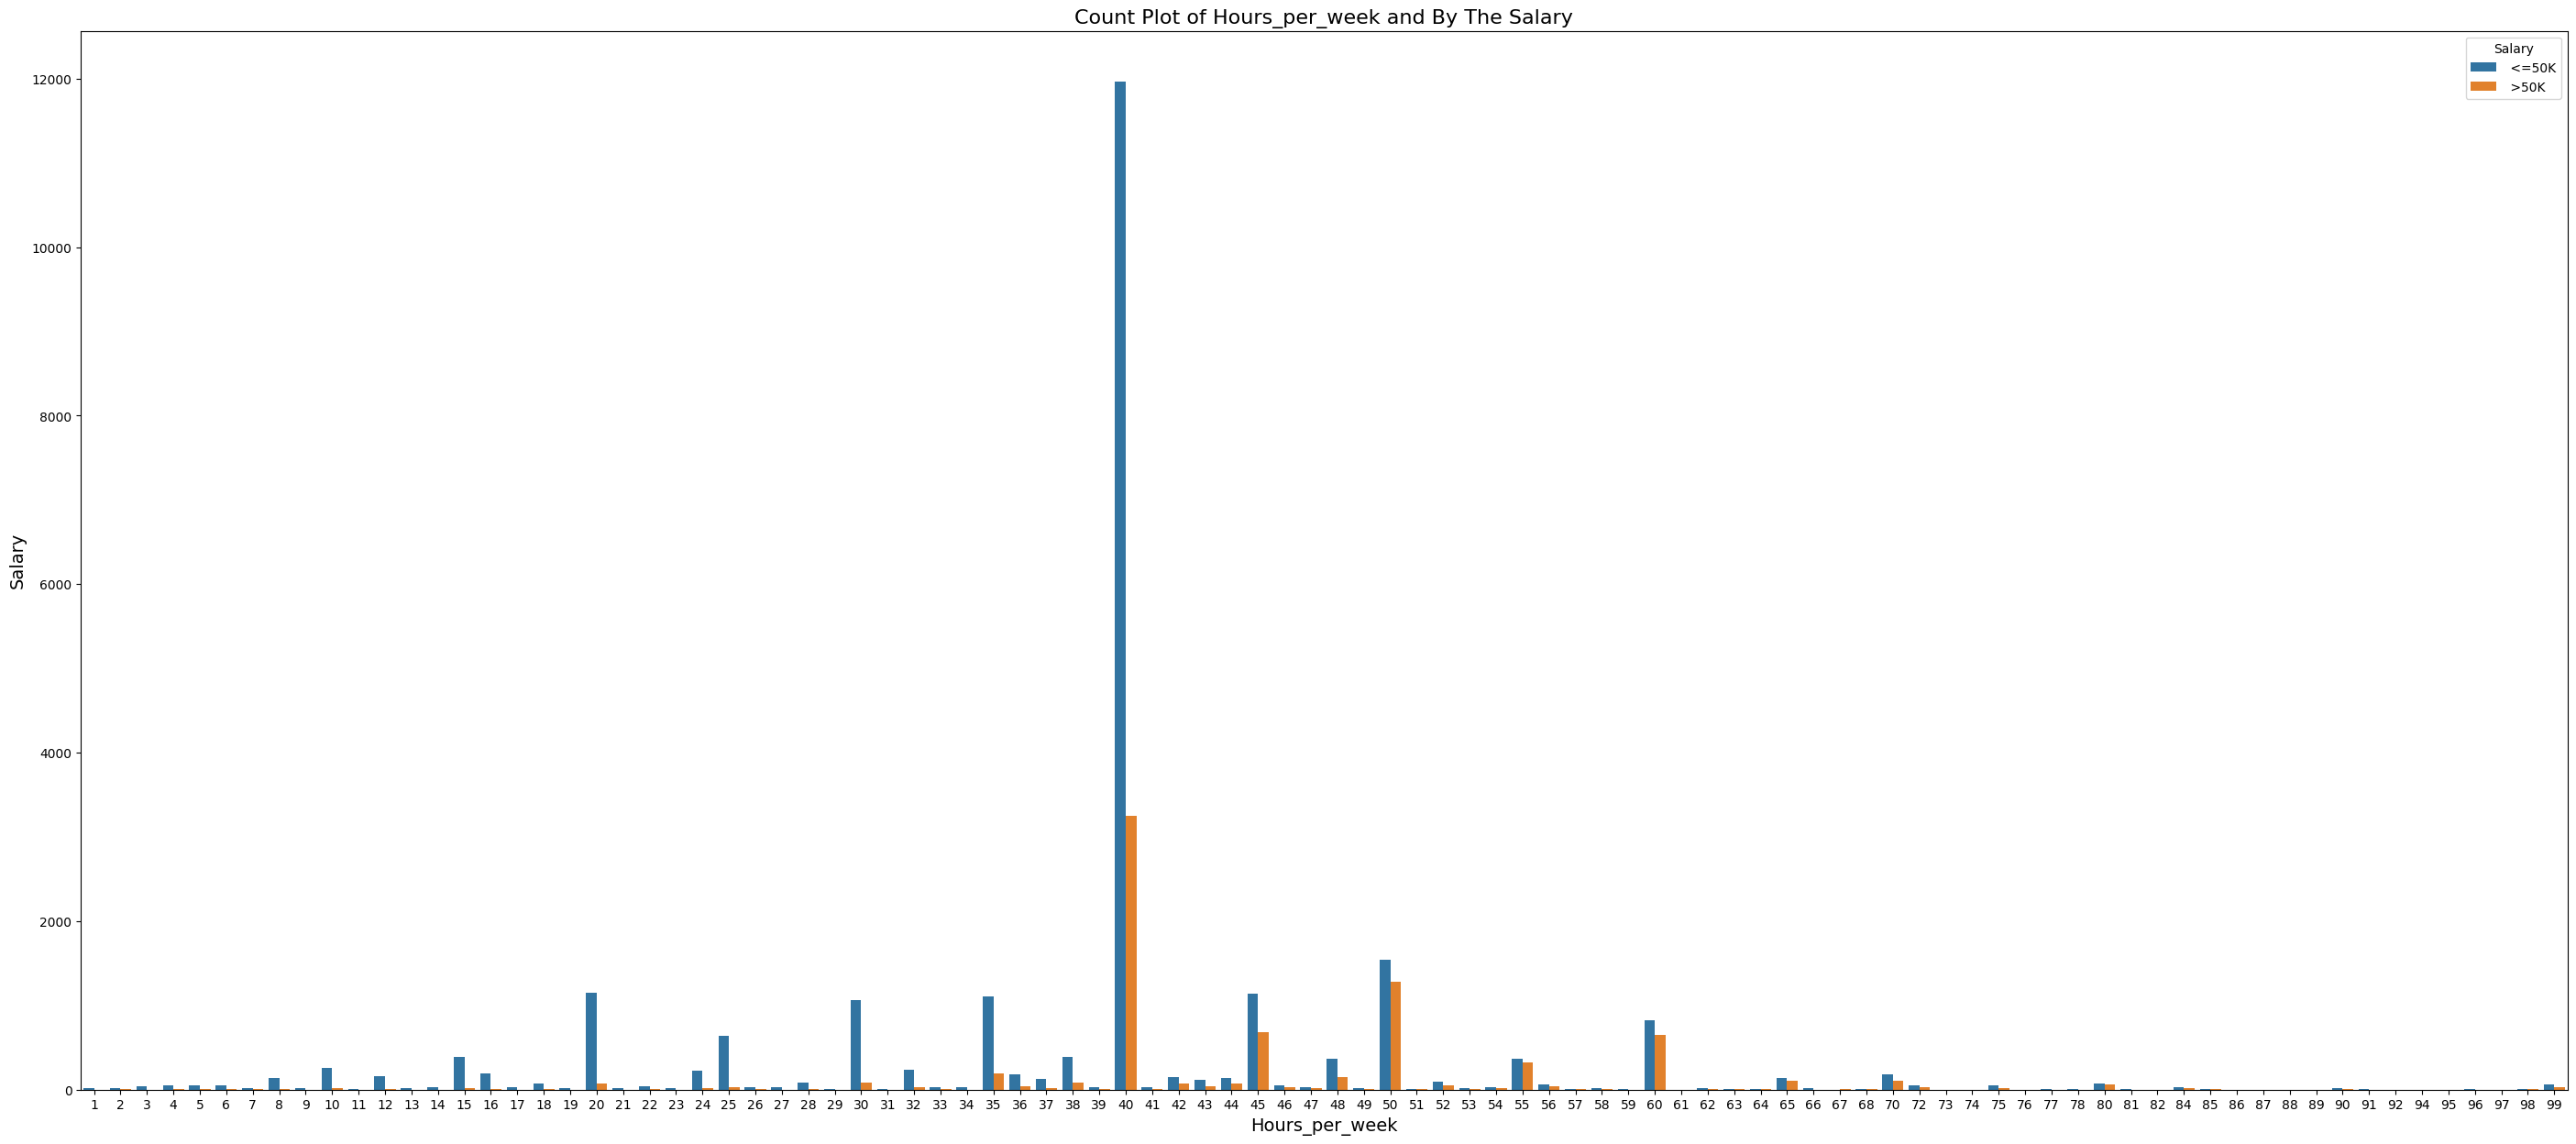

In [39]:
# Hours_per_week and salary
plt.figure(figsize=[35, 15])  # Figure size

x, y = "Hours_per_week", "Salary"
sns.countplot(x=x, hue=y, data=sal_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)

# plt.tight_layout()
plt.show()

### **Correlation Between Variables.**

In [40]:
# correlation between numerical variables
corr = sal_1.corr()
corr

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_weight,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


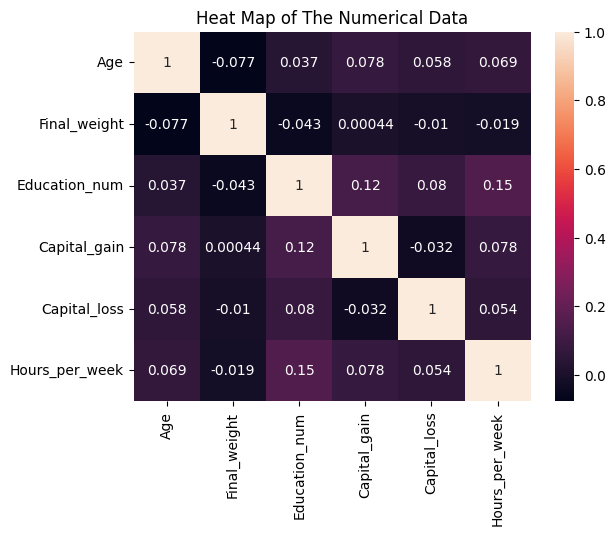

In [41]:
# visualizing using heatmap
sns.heatmap(data=corr, annot=True)
plt.title("Heat Map of The Numerical Data")
plt.show()

# **Split Data Set**

Split dataset into;<br>**Training Set** <br>**Validation Set**<br>**Test Set**

In [42]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 45
TEST_SIZE_1 = 0.2
TEST_SIZE_2 = 0.25
sal_FE = sal_1.copy()

# split the data into train, validation and set
train_val_sal_FE, test_sal_FE = train_test_split(
    sal_FE, test_size = TEST_SIZE_1, random_state = RANDOM_STATE
)
train_sal_FE, val_sal_FE = train_test_split(
    train_val_sal_FE, test_size = TEST_SIZE_2, random_state = RANDOM_STATE
)
train_sal_FE.shape, val_sal_FE.shape, test_sal_FE.shape

((19536, 14), (6512, 14), (6512, 14))

# **Identify Input And Target Columns**

In [43]:
# input columns
input_cols = list(train_sal_FE.columns)[0 : -1]

# target variable
target_var = "Salary"

In [44]:
input_cols, target_var

(['Age',
  'Workclass',
  'Final_weight',
  'Education_num',
  'Marital_status',
  'Occupation',
  'Relationship',
  'Race',
  'Sex',
  'Capital_gain',
  'Capital_loss',
  'Hours_per_week',
  'Country'],
 'Salary')

### **Create Input and Target columns for the train, validation and test sets**.


In [45]:
# train set
train_inputs = train_sal_FE[input_cols].copy()
train_target = train_sal_FE[target_var].copy()

# validation set
val_inputs = val_sal_FE[input_cols].copy()
val_target = val_sal_FE[target_var].copy()

# test set
test_inputs = test_sal_FE[input_cols].copy()
test_target = test_sal_FE[target_var].copy()


In [46]:
# view train inputs
train_inputs

,Age,Workclass,Final_weight,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
19680,31,Private,94235,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,46,United-States
20976,28,Private,148645,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States
30786,29,Self-emp-inc,206903,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
2602,24,Private,161708,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States
3997,37,Private,182668,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,35,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25267,22,Private,188274,12,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States
18682,37,Private,94334,4,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,25,United-States
5153,28,Private,263728,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
28651,50,Self-emp-not-inc,42402,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,30,United-States


In [47]:
# view train targets
train_target

19680     <=50K
20976     <=50K
30786      >50K
2602       >50K
3997      <=50K
          ...  
25267     <=50K
18682     <=50K
5153      <=50K
28651      >50K
14051     <=50K
Name: Salary, Length: 19536, dtype: object

# **Split Into Numerical And Categorical Variables.**

In [48]:
# split into numerical and categorical variables
numeric_vars = train_inputs.select_dtypes(include = [int]).columns.to_list()
categorical_vars = train_inputs.select_dtypes(include = ["O"]).columns.to_list()

numeric_vars, categorical_vars

(['Age',
  'Final_weight',
  'Education_num',
  'Capital_gain',
  'Capital_loss',
  'Hours_per_week'],
 ['Workclass',
  'Marital_status',
  'Occupation',
  'Relationship',
  'Race',
  'Sex',
  'Country'])

In [49]:
# get the number of categories in each categorical variable
train_inputs[categorical_vars].nunique()

Workclass          9
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Country           42
dtype: int64

In [50]:
# descriptive summary of the numerical variables
sal_FE[numeric_vars].describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Scale Numeric Variables**

In [51]:
from sklearn.preprocessing import MinMaxScaler

# scale
scaler = MinMaxScaler()

# fit
scaler.fit(sal_FE[numeric_vars])

MinMaxScaler()

In [52]:
# transform
train_inputs[numeric_vars] = scaler.transform(train_inputs[numeric_vars])
val_inputs[numeric_vars] = scaler.transform(val_inputs[numeric_vars])
test_inputs[numeric_vars] = scaler.transform(test_inputs[numeric_vars])


In [53]:
# descriptive summary of train_inputs
train_inputs[numeric_vars].describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,19536.000000,19536.000000,19536.000000,19536.000000,19536.000000,19536.000000
mean,0.295410,0.120987,0.604446,0.010459,0.020308,0.402215
std,0.187040,0.072207,0.172928,0.071794,0.092826,0.125901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071919,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.113677,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.153570,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Encode Categorical Features**

In [54]:
# number of unique values for each categorical variable
sal_FE[categorical_vars].nunique()

Workclass          9
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Country           42
dtype: int64

In [55]:
# using onehotencoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

ohe.fit(sal_FE[categorical_vars])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [56]:
# categories
ohe.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Others',
        ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov',
        ' Without-pay'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Others',
        ' Priv-house-serv', ' Prof-specialty', ' Protective-serv',
        ' Sales', ' Tech-support', ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object),
 array([' Female', ' Male'], dtype=object),
 array([' Cambodia', ' Canada', ' China', ' Columbia', ' 

In [57]:
# get the feature name for the categories
encoded_cols = list(ohe.get_feature_names_out(categorical_vars))


train_inputs[encoded_cols] = ohe.transform(train_inputs[categorical_vars])
val_inputs[encoded_cols] = ohe.transform(val_inputs[categorical_vars])
test_inputs[encoded_cols] = ohe.transform(test_inputs[categorical_vars])


# **Train Logistic Regression Model**

In [59]:
from sklearn.linear_model import LogisticRegression

#init
model = LogisticRegression(solver = "liblinear")

# fit
model.fit(train_inputs[numeric_vars + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

#### **View Weights And Biases Of Trained Model**

In [58]:
(numeric_vars + encoded_cols)

['Age',
 'Final_weight',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Workclass_ Federal-gov',
 'Workclass_ Local-gov',
 'Workclass_ Never-worked',
 'Workclass_ Others',
 'Workclass_ Private',
 'Workclass_ Self-emp-inc',
 'Workclass_ Self-emp-not-inc',
 'Workclass_ State-gov',
 'Workclass_ Without-pay',
 'Marital_status_ Divorced',
 'Marital_status_ Married-AF-spouse',
 'Marital_status_ Married-civ-spouse',
 'Marital_status_ Married-spouse-absent',
 'Marital_status_ Never-married',
 'Marital_status_ Separated',
 'Marital_status_ Widowed',
 'Occupation_ Adm-clerical',
 'Occupation_ Armed-Forces',
 'Occupation_ Craft-repair',
 'Occupation_ Exec-managerial',
 'Occupation_ Farming-fishing',
 'Occupation_ Handlers-cleaners',
 'Occupation_ Machine-op-inspct',
 'Occupation_ Other-service',
 'Occupation_ Others',
 'Occupation_ Priv-house-serv',
 'Occupation_ Prof-specialty',
 'Occupation_ Protective-serv',
 'Occupation_ Sales',
 'Occupation_ Tech-support',
 'Occupat

In [60]:
# coefficient 
model.coef_.tolist()

[[1.9558723917228087,
  0.642057591313809,
  3.910064407609018,
  14.351637865963148,
  2.2777442380264166,
  2.7930858536740812,
  0.1366986035743265,
  -0.37243274515452873,
  -0.011813234286553165,
  -0.5081131990593932,
  -0.2559531887356289,
  -0.17480668602916333,
  -0.7047361901728193,
  -0.5655032672518678,
  -0.8426036852605312,
  -0.964966156717646,
  1.3843755885477806,
  0.7806669211798324,
  -1.1397747071732434,
  -1.474422614608038,
  -0.9733032451056154,
  -0.911839378501968,
  -0.1702154190454875,
  -0.22687137968532503,
  -0.007098958143367255,
  0.6688487358166341,
  -0.998702926443723,
  -0.9362338921297966,
  -0.3476937235736536,
  -0.9042481354332356,
  -0.5199264333459456,
  -1.0799423741344891,
  0.46967428591847177,
  0.3595234622398129,
  0.18064191173501798,
  0.4903768160082545,
  -0.2773955621619438,
  -0.6182071602471141,
  -0.3311084598739276,
  -1.075160515363076,
  -1.49917952115625,
  -0.4851789482527325,
  0.7095710125159118,
  -0.8930351531174922,
  -

In [61]:
model.intercept_

array([-3.29926359])

In [62]:
weight_var = pd.DataFrame({
                     "feature": numeric_vars + encoded_cols,
                     "weight": model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='feature'>

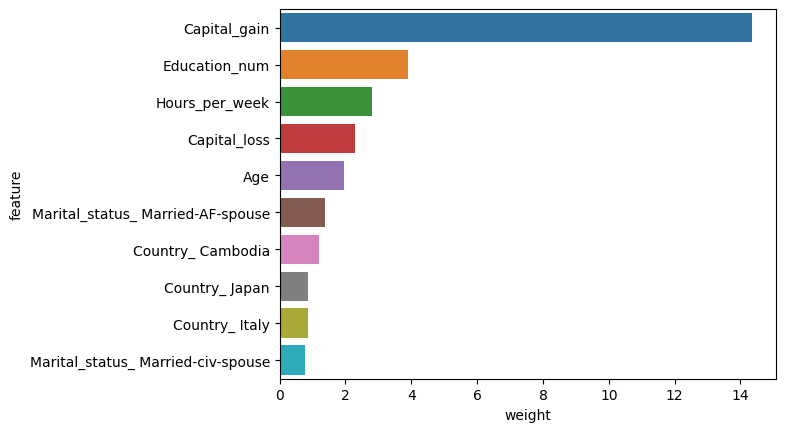

In [63]:
# viewing the variables that have the highest weight in relation to the target variable
sns.barplot(data = weight_var.sort_values("weight", ascending = False).head(10), x = "weight", y= "feature")

In [64]:
x_train = train_inputs[numeric_vars + encoded_cols]
x_val = val_inputs[numeric_vars + encoded_cols]
x_test = test_inputs[numeric_vars + encoded_cols]

In [65]:
# prediction
train_preds = model.predict(x_train)
train_preds

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [66]:
# probability of train set
train_probs = model.predict_proba(x_train)
train_probs

array([[0.50629176, 0.49370824],
       [0.99651628, 0.00348372],
       [0.2131326 , 0.7868674 ],
       ...,
       [0.55048822, 0.44951178],
       [0.13974502, 0.86025498],
       [0.9836285 , 0.0163715 ]])

From the first row in the train_probs, it shows that there is a 51% chance that the individual earns less than or equal to 50k while there is 49% chance that the individual earns more than 50k.

# **Evaluate Model Using Accuracy**

##### **Test the accuracy of the model's prediction**

### **With Train Set**

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(train_target, train_preds)

0.8477682227682227

The model achieves an accuracy of **85%** on the training set.

### **With Validation Set**

In [69]:
val_preds = model.predict(x_val)
accuracy_score(val_target, val_preds)

0.8478194103194103

The model achieves an accuracy of **85%** on the validation set.

In [70]:
val_probs = model.predict_proba(x_val)
val_probs

array([[0.82521252, 0.17478748],
       [0.93986404, 0.06013596],
       [0.98676745, 0.01323255],
       ...,
       [0.75678667, 0.24321333],
       [0.5513623 , 0.4486377 ],
       [0.97822724, 0.02177276]])

From the first row in the val_probs, it shows that there is a 82% chance that the individual earns less than or equal to 50k while there is 17% chance that the individual earns more than 50k.

### **With Test Set**

In [71]:
test_preds = model.predict(x_test)
accuracy_score(test_target, test_preds)

0.855958230958231

The model achieves an accuracy of **86%** on the test set.

In [72]:
test_probs = model.predict_proba(x_test)
test_probs

array([[8.92085983e-01, 1.07914017e-01],
       [9.92287734e-01, 7.71226576e-03],
       [8.11951945e-01, 1.88048055e-01],
       ...,
       [7.62292540e-08, 9.99999924e-01],
       [9.98543720e-01, 1.45627982e-03],
       [8.39188479e-01, 1.60811521e-01]])

From the first row in the test_probs, it shows that there is a 89% chance that the individual earns less than or equal to 50k while there is 11% chance that the individual earns more than 50k.

# **Evaluate Model Using Confusion Matrix**


### **With Train Set**

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target, train_preds, normalize = "true")


array([[0.92919456, 0.07080544],
       [0.40576964, 0.59423036]])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [78]:
# Evaluate Model
labels = [0, 1]

labels = ["<=50k", ">50k"]


conf_matrix = metrics.confusion_matrix(y_true=train_target, y_pred=train_preds)
conf_matrix

array([[13740,  1047],
       [ 1927,  2822]])

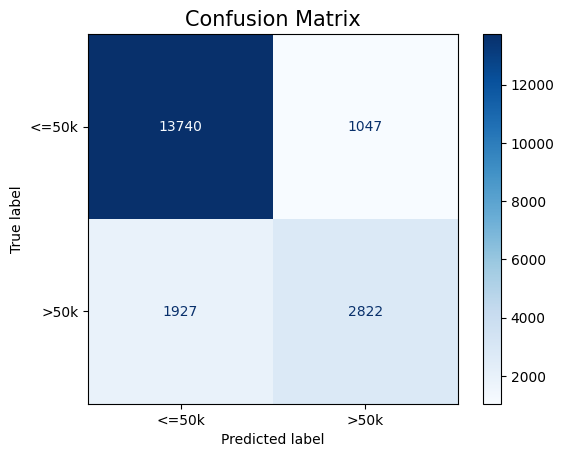

In [79]:
labels = [0, 1]
labels = ["<=50k", ">50k"]


# Make predictions
train_preds = model.predict(x_train)


# Probability of Surviving
train_probs = model.predict_proba(x_train)

conf_matrix = metrics.confusion_matrix(y_true=train_target, y_pred=train_preds)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

### **With Validation Set**

In [80]:
confusion_matrix(val_target, val_preds, normalize = "true")


array([[0.92961995, 0.07038005],
       [0.41650422, 0.58349578]])

In [81]:
# Evaluate Model
labels = [0, 1]

labels = ["<=50k", ">50k"]


conf_matrix = metrics.confusion_matrix(y_true=val_target, y_pred=val_preds)
conf_matrix

array([[4623,  350],
       [ 641,  898]])

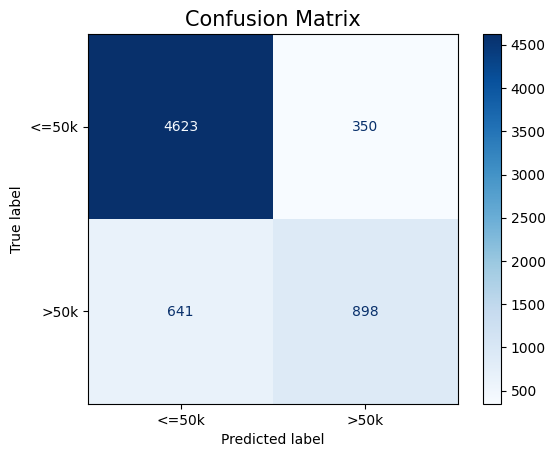

In [82]:
labels = [0, 1]

labels = ["<=50k", ">50k"]


# Make predictions
val_preds = model.predict(x_val)

# Probability of Surviving
val_probs = model.predict_proba(x_val)

conf_matrix = metrics.confusion_matrix(y_true=val_target, y_pred=val_preds)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

### **With Test Set**

In [83]:
confusion_matrix(test_target, test_preds, normalize = "true")


array([[0.93345433, 0.06654567],
       [0.39150032, 0.60849968]])

In [84]:
# Evaluate Model
labels = [0, 1]

labels = ["<=50k", ">50k"]


conf_matrix = metrics.confusion_matrix(y_true=test_target, y_pred=test_preds)
conf_matrix

array([[4629,  330],
       [ 608,  945]])

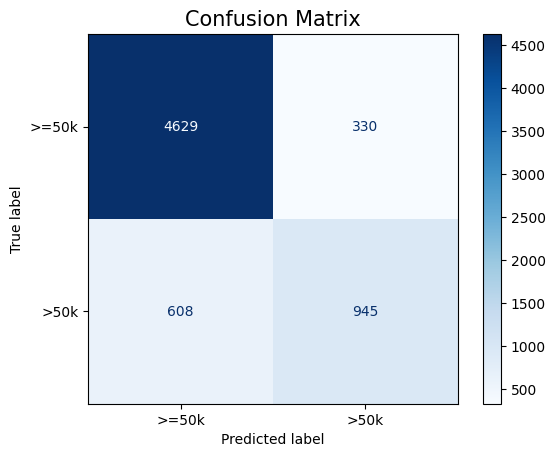

In [85]:
labels = [0, 1]
labels = [">=50k", ">50k"]


# Make predictions
test_preds = model.predict(x_test)

# Probability of Surviving
test_probs = model.predict_proba(x_test)

conf_matrix = metrics.confusion_matrix(y_true=test_target, y_pred=test_preds)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()